Data Visualization
==================

A picture is worth a thousand words, right? This is especially the case
with data projects. There's nothing like a clean graphic to give you the
"smell", look, and feel of the target of your analysis.

This chapter shows you how to use some more of the baked-in
visualization features of pandas. You'll recall that pandas objects wrap
**matplotlib**, Python's native plotting library. This provides a quick
and dirty way see what your data looks like and to communicate your
analytical findings. Mastery at visualization is a discipline unto
itself, of course, and there are many tools available as your
requirements become more complex. We'll just cover the basics here.

Matplotlib with Pandas methods
------------------------------

Pandas provide convenient wrappers for the Matplotlib functionality,
making "quick and dirty" plots easy to implement, as we've already seen.

Here's an example using Seaborn.

<AxesSubplot:>

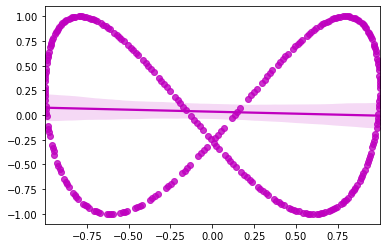

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

s1 = np.fromiter( [np.sin(x/10) for x in range(3, 300)], dtype=float)
s2 = np.fromiter( [np.sin(x/5 + 50) for x in range(3, 300)], dtype=float)

sns.regplot(x=s1, y=s2, color='m')

<AxesSubplot:title={'center':'histogram'}, ylabel='Frequency'>

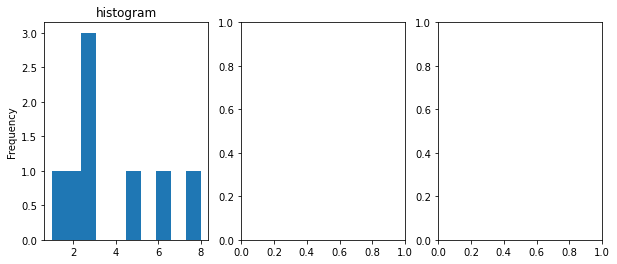

In [2]:
import pandas as pd

ser = pd.Series ( [3, 3, 2, 1, 5, 3, 8, 6])


fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(10, 4))

ax = axes[0]
ax.set_title("histogram")
ser.plot(kind='hist', ax=ax)

Here are a few fundamental plot types build into Pandas' data objects:

<AxesSubplot:title={'center':'line'}>

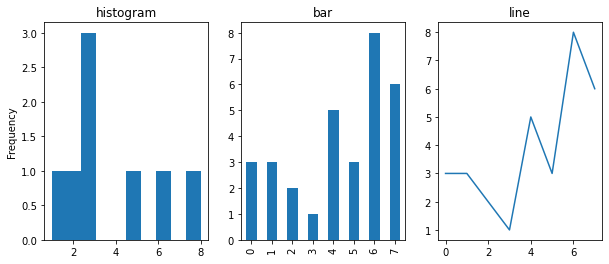

In [3]:
ser = pd.Series ( [3, 3, 2, 1, 5, 3, 8, 6])


fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(10, 4))

ax = axes[0]
ax.set_title("histogram")
ser.plot(kind='hist', ax=ax)

ax = axes[1]
ax.set_title("bar")
ser.plot(kind='bar', ax=ax)

ax = axes[2]
ax.set_title("line")
ser.plot(kind='line', ax=ax)

Plotting works the same way with a **DataFrame** object.  Both DataFrames and Series have the same methods and syntax for creating plots (all are built on top of the matplotlib library).

Here are a couple of quick example using random data:

<AxesSubplot:title={'center':'bar'}>

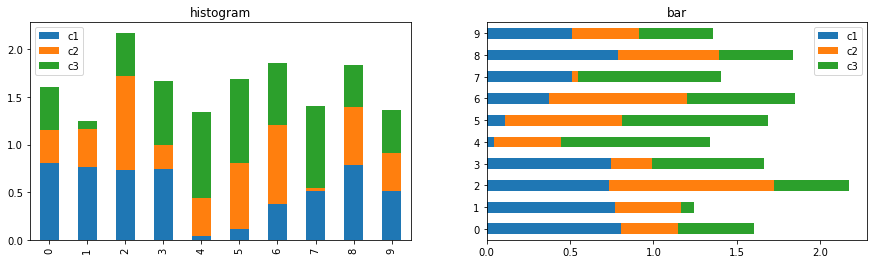

In [4]:
df = pd.DataFrame(np.random.rand(10,3), columns=['c1', 'c2', 'c3'])

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15, 4))

ax = axes[0]
ax.set_title("histogram")
df.plot.bar(stacked=True, ax=ax)

ax = axes[1]
ax.set_title("bar")
df.plot.barh(stacked=True, ax=ax)


<AxesSubplot:>

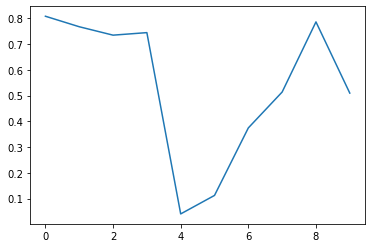

In [5]:
df['c1'].plot()

... again with the images combined post-production.

Several other graph types are available. These include **plot.box**() to
visualize distributions, **plot.area**(), **plot.pie**(),
**plot.scatter**(), and **hexbin** to visualize density via color-coded
hexagons. You can read all about these in the official docs at https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html.

Working With Basic Matplotlib Charts
------------------------------------

The **plot**() of a pandas **Series** object is a method of the
**Series** object, technically, though it's really the
**matplotlib.pyplot.plot**() method under the hood. To create the same
line chart working directly with Matplotlib, we could use the following
code:

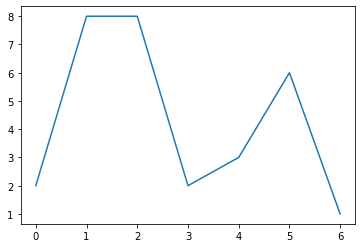

In [6]:
plt.plot([2, 8, 8, 2, 3, 6, 1])

The syntax is a bit different – the pandas wrapper provides a little
extra convenience with keyword arguments like "kind=". However, this
would also produce a line chart with the pandas objects. Other methods
include **plt.bar**() and **plt.hist**().

Working with Compound and Customized Chart Types
------------------------------------------------

Making easy charts is ... well ... easy. To get more granular control
you need to understand a little about the objects in play. You don't
need to memorize this, but it's a good idea to get a 10,000 foot
overview before plunging in.

One way to think about Matplotlib is a bunch of nested containers – sort
of like Russian dolls. At the top level there's a **FigureCanvas**
that's populated with contents by the **Renderer**. The interactions are
orchestrated by the **Artists**, which lays out the specifications for
the shapes, lines, and text that appear on a plot object.

The Artists know about the objects we want to create – things like
**AxisImage** and **Line2D** graphics – and the appropriate container
objects like **Figure, Subplot,** **Axes** used to hold them.

Plotting objects are grouped into a container object called a
**figure**. Generally speaking, you can work with the **figure** to set
the window title and display the whole product. Each figure can have one
or more independent **Subplot** objects ( "charts" in the vernacular).
**Subplot** objects know about things like axes titles, chart titles,
axis formatting, and what sort of chart (line, bar, etc.) to produce.
Each subplot can display one or more data series, each contained in its
own **Axes** object. That's where the data itself lives.

This code demonstrates how to create a chart "the hard way" – by
handling different container objects. You won't typically go about it in
this fashion, but the script takes you on a quick tour of the structure.


Here are some imports and a data series to plot:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 

%matplotlib inline

s1 = np.fromiter( [np.sin(x/10) for x in range(0, 300)], float)

In [8]:
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

limit_output extension: Maximum message size of 10000 exceeded with 13994 characters

We can start by creating a **figure** object. There can be several
figure objects in your script, but only can be active at a time –
references to **pyplot** objects, therefore, don't need to specify which
**figure** is in play. To switch, just specify a different **figure**
number. The **figure** automatically comes with a **canvas** container
into which it will render. We can, optionally, set a reference to it.

Here's our plt.figure:

In [9]:
# Create a master figure container (comes with a free canvas object)

figure = plt.figure(1) #container object
fignum = figure.number #figure index # - one active at a time
canvas = figure.canvas #the canvas the figure renders into

<Figure size 432x288 with 0 Axes>

To a blank **plot** object, we can add an **axes** object. That's the
container that will hold the data. It can be specified directly with a
**tuple** containing size and location settings – all relative to the
size of the **figure's** internal size and shape.

Here, we create a figure.axes object:

In [10]:
left, bottom, width, height = .2, .2, .6, .6
axes = figure.add_axes( (left, bottom, width, height) )


In order to actually plot the data, we need to add an appropriate
object. Optionally, we can set parameters like line color, markings,
labels, etc. There are a half dozen different ways to set these up with
different \*args and \*\*kwargs patterns.

In [11]:
#add data (adds an entry to axes.lines list for free)
axes.plot(s1, 'blue', label = 'axes.plot label')

In this example, we've specified references to several of the available
objects. We can use these to tweak the parameters. 

The legends, labels, etc. are configured to display as their associated property names.  You've made a graphical cheat sheet.

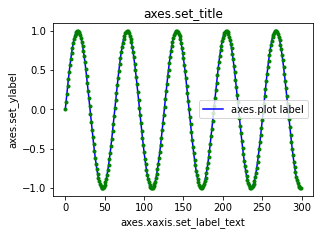

In [12]:
# Canvas
canvas.set_window_title("canvas.set_window_title")

# Axes
axes.xaxis.set_label_text('axes.xaxis.set_label_text')
axes.set_ylabel('axes.set_ylabel')
axes.set_title('axes.set_title')
axes.set(label = "axes.set(label = )")
axes.legend() #turns display on

# line properties
line = axes.lines[0]
line.set_marker('.')
line.set_markerfacecolor('green')
line.set_markeredgecolor('green')
line.set_label("line.set_label")

figure

Since there are literally hundreds of settings on dozens of different
possible objects, there's no sense in trying to remember them all. 

Here are a few ways to get and set their properties:

In [13]:
verbose = False
if verbose:
    # Valid options for the linestyle attribute of a line object
    plt.setp(line, 'linestyle')

    # Current setting for the linestyle attribute of a line object
    current = plt.getp(line, 'linestyle')

    # Change the linestyle attribute
    plt.setp(line, linestyle=current)

    # Get all of the Artist object properties 
    plt.rcParams
    
    # We can capture a dict of all an an object's properties
    figure.properties()
    
    # Get all properties available in Matplotlib.rcParams
    print(rcParams)

You can address the various properties of each of these subplot objects
individually. 

We can begin by creating a bunch of subplots:

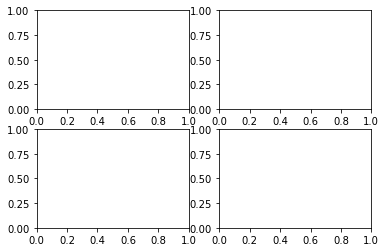

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2)

The object 'ax' is just an array of arrays.   Each inner array represents a row of plots.  So we can address the elements in terms of a 2-D slice in the form of [<row>, <column>].
    
We can format each element independently as its own plot object:

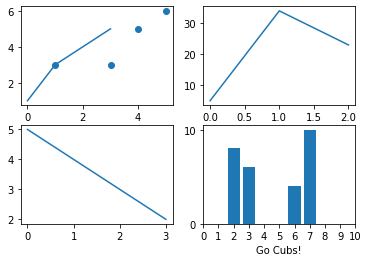

In [15]:
ax[0,0].plot([1, 3, 4, 5])
ax[0,1].plot([5, 34, 23])
ax[1,0].plot([5, 4, 3, 2])
ax[1,1].bar([6, 3, 2, 7], [4, 6, 8, 10])

ax[0,0].scatter([1, 3, 4, 5], [3, 3, 5, 6])
ax[1,1].yaxis.set_ticks([0, 10])
ax[1,1].xaxis.set_ticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax[1,1].set_xlabel("Go Cubs!")

fig

These plots so far are sort of boring, I know. So let's look at some
ways to customize them a bit more and add a modicum of coolness. 

Here's another example:

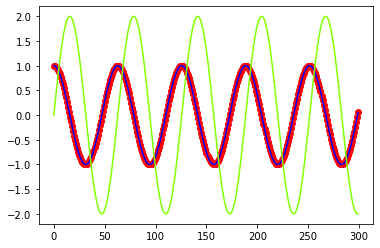

In [16]:
red = 'r'
green = 'g'
greenish = 'chartreuse'
black = 'b'
circle = 'o'

# Some data to plot
s3 = s1 * 2
s4 = pd.Series([np.cos(x/10) for x in range(0,300)])

plt.plot(s4, red + circle, s4, black,
         s3, greenish,
        )


Visualization Tools for Exploratory Data Analysis
-------------------------------------------------

When looking at a new data set, sometimes it's useful to do at least
some first-order numerical exploration. We'll get into more complicated
ones later, but here are a couple simple tools / techniques to get you
going.

**Seaborn** is essentially a high-level interface to Matplotlib.
Like Matplotlib, it works and plays well with the Python scientific
libraries like SciPy and NumPy. With Seaborne, it's easy to produce
really pretty graphics and some statistical analysis with minimal code.
For instance, it has ready access to built-in color theme palettes and
the ability to render complex "mash-ups" of different chart objects. The
downside is that to achieve granular control you still need to
understand, and work directly with Matplotlib, objects.

Even better, it has built-in analytical capability.

Here's a quick example of Seaborn's power. Let's assume we have two data
series. It's possible to conduct a linear regression analysis, plot both
**Series**, plot a linear regression line, and a 1-sigma (one standard
deviation) confidence boundary – all in a few lines of code.

<AxesSubplot:>

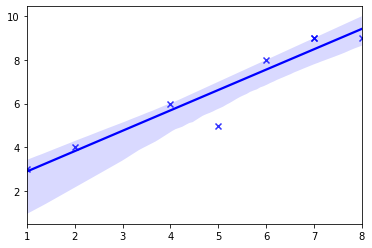

In [17]:
s1 = pd.Series([1,2,4,5,6,7,8,7])
s2 = pd.Series([3,4,6,5,8,9,9,9])

sns.regplot(x=s1, y=s2, color = 'b', ci=95, marker = 'x')

Linear regression is a technique used to find the "best fit" line
through a cloud of data. The idea is to minimize the distance between
the line estimated and data it's estimated against.

This isn't exactly the optimal application for regression, but the plot
is pretty cool – the "figure 8" is a scatter plot of the two data
series. The horizontal line represents the line that describes the best
linear relationship between the dependent variable (s1) and the
independent variable (s2). The light band shows the error band – minimal
at 0 and widening as the values approach the extremes. Pretty good for a
single line of code, don't you think?

If you want a quick snapshot of the relationship between two **Series**,
you can use Seaborn's **jointplot**() method. You get the distribution
of each variable, a "heat map" of the joint probabilities, and the
Pearson's R – a measure of the correlation between the elements of two
data series, along with its p-value. 

Here's an example:

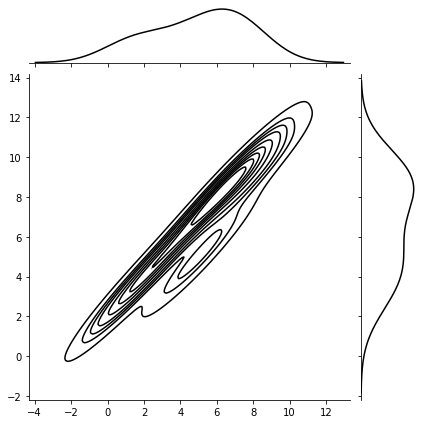

In [18]:
sns.jointplot(x=s1, y=s2, kind='kde', color='k')

There are also some univariate (one variable at a time) methods
available within Seaborn. One is the **distplot**() method. It will show
a histogram of the data then will attempt to fit a distribution to it.
By default it will use a Kernal Density Estimation (KDE) for the
fit. This is a nonparametric method (doesn't use a formula for the base
shape) to figure what shape the population of all possible values
probably looks like. This may be a choice for small sample sizes as we
have here, or data you have no idea about. 

Right out of the box, here's
what you can do:

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

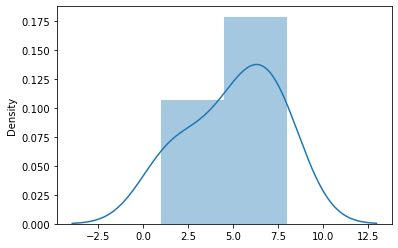

In [19]:
sns.distplot(s1)

It's easy enough to get it to try to fit another distribution – all you
have to do is give it the alternative distribution. If you want to
report the characteristics of that distribution, you can take advantage
that all of the tools we're discussing here – SciPy, NumPy, pandas, and
Seaborn are built on the same stack of constituent elements. 

Here, we
can delve into the **scipy.stats** library to get both the distribution
to use and fit metrics.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


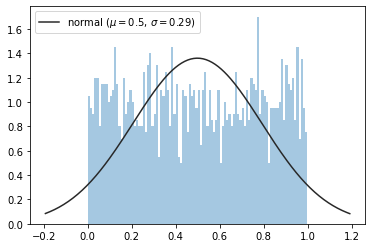

In [20]:
from scipy import stats

s1 = pd.Series([np.random.rand() for _  in range(2000)])
mu, sigma = stats.norm.fit(s1)

ax = sns.distplot(s1, kde=False, fit=stats.norm, bins=100)
plt.title = "Check against normal"
ax.legend(["normal ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])

As you can we used the **stats.norm.fit**() method to do the heavy
lifting. Alternatively, we might have used **stats.chi2.fit**().
Chi-squared is another distribution – it's close to the normal
distribution in shape and better suited to small sample sizes.

The funny looking text for the legend works with Jupyter notebooks –
they know how to translate various kinds of text format strings like
this:

     'normal ($\\\\mu=$5, $\\\\sigma=$2.35)'

... into nicely-formatted text. This particular example uses **LaTeX**,
a general-purpose mathematical equation rendering language supported in
Jupiter's Markdown implementation.

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

Another way to get a quick hit on your data is to use a "box-and-whisker
plot" (sometimes called simply "box plot"). It shows the min/max values,
median, and quartile boundaries. 

It's another "one liner" in
implementation:

<AxesSubplot:>

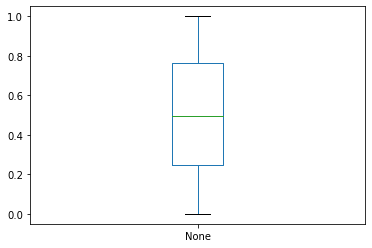

In [21]:
s1.plot.box()

Other Visualization Tools
-------------------------

Some of the other tools in the Python visualization ecosystem include:

-   **Bokesh** - compares, more than contrasts with Seaborn.

-   **Pygal** - produces high-quality, vectorized graphics.

-   **Plotly** – online library that works with Python API.

-   **ggplot** – simplified plotting tool based on ggplot2 (for R);
    works and plays well with pandas.

This is just a "tip of the hat" to these other tools, but your own
exploration is encouraged. The remainder of this course will focus on
Matplotlib and Seaborn.

## Exercise
Please create a four-quadrant plot using data from "baseball_stats.xls" with this layout:


- NW: a histogram of the batting average (the "avg" column).


- NE: an overlay of the batting average and the associated normal distribution curve (using the batting average's mean and standard deviation). Feel free to build on the recipe in the text.


- SW: a scatter plot comparing the ratio of walks ("bb" column) to at_bats ("at_bat" column) on one axis and hits to at_bats (the "avg" column).


- SE: a scatter plot comparing the ratio of strikeouts ("k" column) to at_bats ("at_bat" column) on one axis and hits to at_bats (the "avg" column).


The tick marks on both of the scatter plots should be the same on the x-axis and y-axis. That's so that observations falling on a diagonal line through the origin would indicate that there's no difference in propensity to (walk/strike out) and the propensity to get a hit. You can manage the tick marks with the set_ticks() method.


All the subplots should have appropriate titles (hint: consider using the **set_title()** method).


Solution:  solution_baseball.ipynb

Datetime Objects
================

Many streams of data come to us as time series of some sort or another.
Pandas is particularly well-adapted to wrangling these and has a lot of
tools to take care of digesting various data types, filling in missing
data, figuring out things like holidays, fiscal quarters, and weekends –
all built in.

Much of the magic comes from the tools to manufacture and manipulate
**Series** indices. We will explore some of these operations in this
chapter.

Basic Time Series Operations
----------------------------

You'll recall that **Series** index elements can be any hashable
object. Most **datetime**-like objects fit this bill and are
typically used to index data structures containing time series. Pandas
has a special object, a **DatetimeIndex**, for this purpose.

An easy way to create a **DatetimeIndex** is to apply the
**date\_range()** method. One nice thing about **date\_range()** is that
it can handle anything that remotely looks like a date and reliably do
the right thing. 

These all produce dates from Jan 1, 2017 - Jan 5, 2017:

In [22]:
import datetime

index = pd.date_range(start = '1/1/2017', periods = 5, freq = 'd')
index = pd.date_range(start = 'Jan 1 2017', periods=5, freq = 'd')
index = pd.date_range(start = datetime.datetime(2017,1,1), \
periods = 5, freq = 'd')
index = pd.date_range(start = '1 Jan 2017', end = '5 Jan 2017')
index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')

As you can see, there are many options for specifying the index. The
optional '**freq'** keyword argument can be specified as: 'A' (annual),
'M' (monthly), 'D' (daily), 'H' (hourly), 'M' (each minute), 'S" (each
second), and 'MS' (each millisecond). There are several flavors of 'A'
available e.g., 'A-MAR' (every year on March 1).

It's possible to create a **Series** object with a date index and data
in one fell swoop. It's also possible to swap or modify the index after
the **Series** already exists. 

Here's an alternative way to create a
**Series**:

In [23]:
data = [10, 20, 30, 40]
index = pd.date_range(start = '1 Jan 2017', end = '4 Jan 2017')
ser = pd.Series(data = data, index = index)
ser

2017-01-01    10
2017-01-02    20
2017-01-03    30
2017-01-04    40
Freq: D, dtype: int64

Introspecting Time Series
-------------------------

Once we have a time series, we can treat it like any other **Series**
object, but with a couple of twists. Here, we'll work with some
political polling data from Real Clear Politics https://www.realclearpolitics.com/. The first few lines
of "clean\_polling\_data.csv" containing it look like this:

    date,poll,size,stype,approve,disapprove,spread
    2017-04-24 00:00:00,Rasmussen Reports,1500,LV,47,53,-6
    2017-04-23 00:00:00,Gallup,1500,A,40,54,-14
    2017-04-20 00:00:00,ABC News/Wash Post,1004,A,42,53,-11

The first line contains a comma-separated header (no spaces) which will
be picked up and added automatically as column index values when we
execute **read\_csv**() to import it.

This bit of code loads up the CSV file – assuming it's in the same
directory as the script / notebook then requests metadata on the
resulting **DataFrame** object. Note that we can specify column(s) to be
cast into **datetime** objects upon import.

In [24]:
import pandas as  pd            
import os

datadir = 'data'
fn = 'clean_polling_data.csv'
datafile = os.path.join('.', datadir, fn)

df=pd.read_csv(datafile, parse_dates=[0]) #dialect defaults to Excel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        88 non-null     datetime64[ns]
 1   poll        88 non-null     object        
 2   size        88 non-null     int64         
 3   stype       88 non-null     object        
 4   approve     88 non-null     int64         
 5   disapprove  88 non-null     int64         
 6   spread      88 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 4.9+ KB


In [25]:
df

,date,poll,size,stype,approve,disapprove,spread
0,2017-04-24,Rasmussen Reports,1500,LV,47,53,-6
1,2017-04-23,Gallup,1500,A,40,54,-14
2,2017-04-20,ABC News/Wash Post,1004,A,42,53,-11
3,2017-04-20,NBC News/Wall St. Jrnl,900,A,40,54,-14
4,2017-04-18,PPP (D),648,RV,43,50,-7
...,...,...,...,...,...,...,...
83,2017-01-24,PPP (D),1043,RV,44,44,0
84,2017-01-25,Quinnipiac,1190,RV,36,44,-8
85,2017-01-24,Gallup,1500,A,46,45,1
86,2017-01-24,Rasmussen Reports,1500,LV,57,43,14


We can have a quick look at the first few rows using the **head**()
method. We'll do this after configuring how the text will display with
**pandas.set\_option**(). We'll also use the 'date' column as the index
since this is a time series.

In [26]:
pd.set_option('display.max_rows', 4)  #default for head(), tail(), etc.
pd.set_option('display.width', 500)   #keeps columns from wrapping
df.set_index('date', inplace=True)
df.head(3)  

,poll,size,stype,approve,disapprove,spread
date,,,,,,
2017-04-24,Rasmussen Reports,1500,LV,47,53,-6
2017-04-23,Gallup,1500,A,40,54,-14
2017-04-20,ABC News/Wash Post,1004,A,42,53,-11


Our data is now in a **DataFrame** object. To grab a **Series**, all we
need to do is select a column (recall that a **DataFrame** is just a
stack of **Series** objects). Most of the methods, like **head**() will
still work.

In [27]:
ser=df['poll']
print(type(ser))
ser.head(3)

<class 'pandas.core.series.Series'>


date
2017-04-24     Rasmussen Reports
2017-04-23                Gallup
2017-04-20    ABC News/Wash Post
Name: poll, dtype: object

It's easy to find out all the polling organizations in our data set.
This bit of code uses **unique**() to find one of each then sorts them
alphabetically:

In [28]:
ser.iloc[3]
unique=ser.unique()
unique.sort()
print('found {} unique items:\n{}'.format(len(unique), unique))

found 19 unique items:
['ABC News/Wash Post' 'CBS News' 'CNBC' 'CNN/ORC' 'Economist/YouGov'
 'Emerson' 'FOX News' 'Gallup' 'IBD/TIPP' 'Marist' 'McClatchy/Marist'
 'Monmouth' 'NBC News/Wall St. Jrnl' 'PPP (D)' 'Pew Research' 'Quinnipiac'
 'Rasmussen Reports' 'Reuters/Ipsos' 'USA Today/Suffolk']


Let's go ahead and create a new **Series**, this time based on the
polling "spread". That's the difference between "approve" and
"disapprove" ratings for a certain president.

In [29]:
ser=pd.Series(df['spread'])
ser.head(3)

date
2017-04-24    -6
2017-04-23   -14
2017-04-20   -11
Name: spread, dtype: int64

If we want, we can create an **ndarray** based only on the values using
the cleverly-named **values**() method:

In [30]:
df['spread'].values

array([ -6, -14, -11, -14,  -7,  -6, -16,  -9, -10,  -9, -11,  -6,  -6,
       -10,  -9, -10,  -8,  -7,  -4, -22, -13, -22, -24, -12,  -5, -12,
        -5, -13, -15,  -8,  -5,   0, -19,  -5,  -8, -14,  -9,  -4,  -7,
        -6, -11,  -2,   2, -11,  -2,   3,  -7,  -6, -12,  -9,   0,  -2,
        -3,  -4, -12, -10,   2,  -5,   0, -17,  -8, -13,  -3,   6,   1,
        -4, -12, -10,  -5,  -9,   1,   6,   1,  -9,  -8,  -9,  -6,  -2,
        -9,   6,   2,  -1,   4,   0,  -8,   1,  14,  -2], dtype=int64)

We want to be a little careful here. Our **Series** object is not a
free-standing object. It's hot-linked to the original **DataFrame** – a
"view" instead of a deep copy. This is really important because any
change we make to the **Series** object is also reflected in the
original. 

Here, we'll change the first value of the **Series** to
something strange – 9999 then look at the **DataFrame**:

In [31]:
first_val=ser[0]      #record the original value
ser[0]=9999
df.head(3)

,poll,size,stype,approve,disapprove,spread
date,,,,,,
2017-04-24,Rasmussen Reports,1500,LV,47,53,9999
2017-04-23,Gallup,1500,A,40,54,-14
2017-04-20,ABC News/Wash Post,1004,A,42,53,-11


If we want to create an independent object, one way to go about it would
be to make a **copy** of the original, then pick off its **values**. The
following code does just that then "borrows" the index from the
original. Now we can change the values of the **Series** without
impacting the **DataFrame** object. No worries about the index, either –
it's also decoupled from the original.

In [32]:
# Restore to original
ser[0]=first_val    

# Decoupled Series from copy of DataFrame
ser_1=pd.Series(df['spread'].copy().values)    
ser_1.index=df.index
ser_1[0]=999
df.head(3)

,poll,size,stype,approve,disapprove,spread
date,,,,,,
2017-04-24,Rasmussen Reports,1500,LV,47,53,-6
2017-04-23,Gallup,1500,A,40,54,-14
2017-04-20,ABC News/Wash Post,1004,A,42,53,-11


... and as you can see, the **Series** has reflected the change we just
made:

In [33]:
ser_1.head(3)

date
2017-04-24    999
2017-04-23    -14
2017-04-20    -11
dtype: int64

Let's have a look at the dataset's main parameters:

In [34]:
ser_1.describe()

count     88.000000
mean       4.795455
            ...    
75%       -2.000000
max      999.000000
Length: 8, dtype: float64

Separately we can explore the index with methods like **index.max**()
and **index.min**()

In [35]:
print("max index is:  {}".format(ser_1.index.max()))
print("min index is:  {}".format(ser_1.index.min()))

max index is:  2017-04-24 00:00:00
min index is:  2017-01-24 00:00:00


It's easy to find the smallest (or largest) few elements with
**nsmallest**() and **nlargest**() like so:

In [36]:
ser_1.nsmallest(3) 

date
2017-03-28   -24
2017-04-03   -22
2017-03-30   -22
dtype: int64

Other introspection tools available allow you to figure out how many
unique values there are, whether there's any missing data, whether it's
monotonic, etc. 

Here are a few of them:

In [37]:
print(f"number of unique values:  {ser_1.nunique()}")
print(f"monotonic?  {ser_1.is_monotonic}")
print(f"any NaN?  {ser_1.hasnans}")
print(f"size:  {ser_1.size}".format())

# Autocorrelation
print(f"\nautocorrelation coefficient: {ser_1.autocorr():.3f}")

# Random values - useful for large datasets
print("\na few random values:\n{}".format(ser_1.sample(n=3) ))

number of unique values:  28
monotonic?  False
any NaN?  False
size:  88

autocorrelation coefficient: -0.098

a few random values:
date
2017-02-28    -9
2017-03-28   -24
2017-03-28   -12
dtype: int64


Tools for Holidays, Business Days, Etc.
---------------------------------------

Sometimes when working with time-dependent data, we're interested in not
just the data, but how their timing relates to the outside world. If
we're in the candy business, we might be really interested in what day
Easter falls on. In case you're interested, it's the first Sunday after
the first Monday after the Spring equinox. If we do business accounting,
we might care when fiscal quarters begin and end, or what the last
business day of a month (accounting for holidays, of course) will be.

This is far too much to want to keep in your head. Fortunately the
Pandas **Series** objects know a lot about dates generally.

There are dozens of built-in tools like permutations of "quarters" like
**QuarterEnd**() and **QuarterBegin**(). Other methods keep track of the
beginning and end of months and business months such as
**thisBMonthEnd**(). Still others have granularity to the level of
business hours. Depending of the version of pandas you're using, these
are housed in the **pandas.core.datetools** (older) or in the
**pandas.tseries** (newer) libraries. 

We'll import these here:

In [38]:
import pandas.tseries.holiday as hol
import pandas.tseries.offsets as off

First, let's cover a few basics. Pandas has a built-in object called a
**DatetimeIndex**. It's used, as you might imagine from its name, as one
way to index a **Series** object. It's sort of a souped-up **datetime**
object – it's time zone aware, can be used to calculate
**timedelta**-like objects, etc. It can be coupled with a **DateOffset**
object that allows calculations to be made based on built-in or
customized time spans.

Of course, Pandas has a **datetime** object – we've already used it as
the index for the elections dataset. It's called simply
**pandas.datetime** and works just like the standard version. 

We can use
one to set a start point for a **DatetimeIndex** generated with the
**date\_range**() method:

In [39]:
from datetime import datetime
new_year=datetime(2017, 1, 1)
print('daily:', pd.date_range(start=new_year,periods=3, freq='d'))
print('monthly:', pd.date_range(start=new_year,periods=3, freq='M'))
print('annually:', pd.date_range(start=new_year,periods=3, freq='A'))

daily: DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'], dtype='datetime64[ns]', freq='D')
monthly: DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31'], dtype='datetime64[ns]', freq='M')
annually: DatetimeIndex(['2017-12-31', '2018-12-31', '2019-12-31'], dtype='datetime64[ns]', freq='A-DEC')


Here, we've started with New Year's Day and have spun up three-element
**DatetimeIndex** objects – separated by a day, a month, and (roughly,
due to rounding) a year. We could alternatively provide a beginning, an
end, and a frequency and it would work well.

The next example uses **bdate\_range**() to gin up business dates – no
holidays or weekends. It works just like **date\_range**() otherwise.

Here, we're asking for the last day of each quarter in 2019.

In [40]:

qtrs=pd.bdate_range(datetime(2019,1,1), datetime(2020,1,1), freq='BQ')
qtrs

DatetimeIndex(['2019-03-29', '2019-06-28', '2019-09-30', '2019-12-31'], dtype='datetime64[ns]', freq='BQ-DEC')

These objects are pretty clever and can be interrogated easily:

In [41]:
first_q=qtrs[0]
print("first_quarter", first_q)
print("week", first_q.weekofyear)
print("ordinal day", first_q.dayofyear)
print("ordinal day of week", first_q.dayofweek)
print("is quarter end?", first_q.is_quarter_end)

first_quarter 2019-03-29 00:00:00
week 13
ordinal day 88
ordinal day of week 4
is quarter end? True


When we provided a "**freq=**" keyword argument, we've invoked
under-the-hood methods that apply a **DateOffset** object to the
original **datetime** object. These essentially perform time-specific
math, sparing you the gory details of just what that entails.

Here's an easy way to advance a year:

In [42]:
myday = datetime(2020, 1, 1)
print("plus a year:  ", myday + pd.DateOffset(years=1))

plus a year:   2021-01-01 00:00:00


A little easier might be to use the vast library of built in offset
objects from the **pandas.tseries.offsets** library (imported above as
"off"). That's where the baked-in logic to find business quarters, etc.
lives. 

A few examples:

In [43]:
from pandas.tseries import offsets as off
print("advance a day:", myday + off.BDay())
print("this Q end:", myday + off.QuarterEnd())
print("last Q end:", myday - off.QuarterEnd())
print("second-last Q end:", myday - 2 * off.QuarterEnd())

advance a day: 2020-01-02 00:00:00
this Q end: 2020-03-31 00:00:00
last Q end: 2019-12-31 00:00:00
second-last Q end: 2019-09-30 00:00:00


We can roll forward a quarter at a time.   Here are the next few starting days:

In [44]:
offset = off.QuarterBegin()
r = offset.apply(myday)
for _ in range(4):
    r = offset.apply(r)
    print (r)

2020-06-01 00:00:00
2020-09-01 00:00:00
2020-12-01 00:00:00
2021-03-01 00:00:00


Here, we used the **apply**() method to iteratively push to the next
quarter. Alternative methods include **rollforward**() and
**rollback**().

There is a large stash of holidays in the **pandas.tseries.holidays**
library. 

They can be used to create a **DatetimeSeries** like this:

In [45]:
from pandas.tseries import holiday as hol
easter=pd.date_range(start=datetime.now(),\
                         freq=hol.Easter(), \
                         periods=3)
print("Happy Easter!")
for day in easter:
    print (f'{day.year}-{day.month}-{day.day}')

Happy Easter!
2022-4-17
2023-4-9
2024-3-31


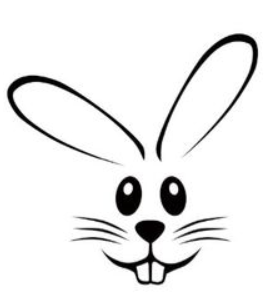

The holidays library contains movable days like **USThanksgiving** and
**USLaborDay**, "navigational" tools like after\_nearest\_**workday**(),
a **USFederalHolidayCalendar** and tools for building your own
customized calendars. You are welcome to explore.

Comparing and Combining Data From Different Series
--------------------------------------------------

Now what if we wanted to compare the results of a couple different polls
to compare trends? As we've already seen, the polls are released on
different schedules. To make a good comparison, we really want to align
the different polls to a common timeline – in other words, we probably
want to fill in the 'gaps' in our data base so all possible calendar
days are represented and each pollster's results are represented in
their particular 'slot'.

We'll start fresh with the Presidential Approval database, which we
imported with the **read\_csv**() method to produce the **DataFrame**
object "df". These examples use a comparison of Quinnipiac
(KWIHN'-uh-pee-ak) and Gallup polls to show some how to wrangle
disparate data series.

Let's start by picking off only these two polls, putting each into its
own **DataFrame** object. To isolate these from the original, we'll
apply the **copy**() method. To ensure monotonically increasing dates
(earliest first) we'll also do a **sort**() operation. 

Here are the
first few rows of each.

In [46]:
qpoll = df.copy().query(  'poll=="Quinnipiac"')
rpoll = df.copy().query('poll=="Rasmussen Reports"')

# sort to ensure monotinic, earliest-to-latest dates
qpoll.sort_index(inplace=True); rpoll.sort_index(inplace=True)
print(qpoll[:3])
print()
print(rpoll[:3])  

                  poll  size stype  approve  disapprove  spread
date                                                           
2017-01-25  Quinnipiac  1190    RV       36          44      -8
2017-02-06  Quinnipiac  1155    RV       42          51      -9
2017-02-21  Quinnipiac  1323    RV       38          55     -17

                         poll  size stype  approve  disapprove  spread
date                                                                  
2017-01-24  Rasmussen Reports  1500    LV       57          43      14
2017-01-31  Rasmussen Reports  1500    LV       53          47       6
2017-02-07  Rasmussen Reports  1500    LV       53          47       6


A couple of things probably jump out. The earliest date is the
25h of January for qpoll, but the 24th for the
rpoll. In fact, none of the dates match up. 

If we wanted to print out a
nice graph showing the results over time, it could be confusing. What we
really want to do is provide a common time scale (or more generally a
"unit of analysis") for both. You may get a **SettingsWithCopyWarning**
which you can safely ignore.

The new index will need to be "wide" enough to get all the polls – so
we'll want to find the earliest date and latest date from both. For
display purposes, we might pad both out to grab a few days on either
side. We can probe each index for the **min**() and **max**() values of
its **index** then use a **DateOffset** to bridge between the earliest
and latest dates. 

Armed with results, we can create a **DatetimeIndex**
object and use the **reindex**() method to create synchronized indices.

Here is how we might implement this strategy:

In [47]:
#figure out the first and last dates
start=min(qpoll.index.min(), rpoll.index.min())
end=max(qpoll.index.max(), rpoll.index.max())

# Throw in a a few days on either end (note 
#  negation in the new start offset)
padding=3  
newstart=start+pd.DateOffset(days=-padding)  
newend=end+pd.DateOffset(days=padding)

# ... gin up a new date_range for the index
newix=pd.date_range(newstart, newend, freq='d')

# ... apply it to both Series
qpoll=qpoll.reindex(pd.to_datetime(newix))
rpoll=rpoll.reindex(pd.to_datetime(newix))

In [48]:
print(f"Qpoll:\n\n {qpoll[2:6]}  \n\nRasmussen:\n\n {qpoll[2:6]}")

Qpoll:

                   poll    size stype  approve  disapprove  spread
2017-01-23         NaN     NaN   NaN      NaN         NaN     NaN
2017-01-24         NaN     NaN   NaN      NaN         NaN     NaN
2017-01-25  Quinnipiac  1190.0    RV     36.0        44.0    -8.0
2017-01-26         NaN     NaN   NaN      NaN         NaN     NaN  

Rasmussen:

                   poll    size stype  approve  disapprove  spread
2017-01-23         NaN     NaN   NaN      NaN         NaN     NaN
2017-01-24         NaN     NaN   NaN      NaN         NaN     NaN
2017-01-25  Quinnipiac  1190.0    RV     36.0        44.0    -8.0
2017-01-26         NaN     NaN   NaN      NaN         NaN     NaN


So let's check out the damages – here we're comparing a few days' worth
of data from each. You can see that the dates are now aligned, that all
the intermediate days are represented, and that known data are nicely
"slotted in" to the right locations.

As you can see, as the data got 'spread out' and the gaps have been
filled in with 'NaN'. You'll recall that **np.NaN** is an object, sort
of like **None**, that serves as a placeholder. It doesn't factor into
calculated values such as mean or standard deviation, so it's
well-behaved from a computational perspective.

Using a routine included in your class files ("py\_plotting\_utils.py")
we can render the two polling sequences with the data we've processed to
date. 

You are encouraged to study, pillage, ransack, plagiarize, improve
upon anything here to make your own plotting routine.

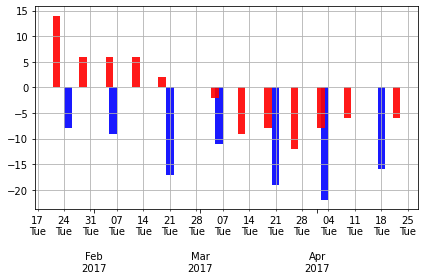

In [49]:
from py_plotting_utils import formatPlotBar

#... specify a column to print
col_to_plot='spread'

#... add some aesthetic elements
q_label ='Quinnipiac'; r_label = 'Rasmussen' 
q_color='b'; r_color='r'
bar_width=2.0; opacity=.9
title = "{} versus {} - {}".format(q_label, r_label, col_to_plot)

chart = formatPlotBar(start=newstart, end=newend, 
              s1=qpoll[col_to_plot], s2=rpoll[col_to_plot],
              s1_label=q_label, s2_label=r_label, 
              s1_color=q_color, s2_color=r_color,
              x_label='', y_label=col_to_plot, title=title,
              bar_width=bar_width, opacity=opacity)

Time Shifting and Time "Window" Operations
------------------------------------------

Sometimes, you will want to "phase shift" your data – shifting each data
point to a new index value. For instance, these polling data are indexed
by the poll release date. But, as a practical matter, they represent
opinions from some point in the past. A survey might be in the field for
several days in order to get enough data points and demographic coverage
to be statistically interesting. The polling data reported necessarily
lags public opinion by a few days.

This is pretty easy to represent in pandas by using the **shift**()
method of the **DataFrame** object and adding a new column to the
original. 

Here's how that might be accomplished:

Data collected from the real world is sometimes "noisy" – observations
you record about some phenomenon are always different than the real
state of the phenomenon. This is particularly the case in the social
sciences because of the inherent inconsistencies in human thought. For
instance, with polling data respondents might have relatively unchanging
core beliefs, but the reported belief on any day can be conditioned on
the latest headline, a lively discussion over a chilled ale, the latest
tweet, or even just the respondent's current mood. In such cases, a
moving average might be a more reasonable (and certainly more stable)
assessment of the core beliefs.

Pandas supports moving "windows" quite handily with the **DataFrame**
**rolling**() method. In this example, we're applying a three-week
moving average and stipulating that a minimum of two observations are
required. (It will report **'NaN'** when there are not enough
observations). 

Here's how you can pull it off:

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

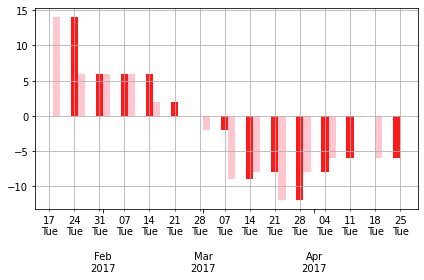

In [50]:
import pandas.tseries.offsets as off

lag_days=5 #to get more granular, we'd need to rescale to hours
rpoll['spread_lag']=rpoll['spread'].shift(- 3)
title="Actual versus Reported Spread"
s2=rpoll['spread_lag']
s2_color='p'
formatPlotBar(start=newstart, end=newend, 
              s1=rpoll['spread'], s2=rpoll['spread_lag'],
              s1_label=r_label, s2_label=r_label, 
              s1_color=r_color, s2_color='pink',
              x_label='', y_label=col_to_plot, title=title,
              bar_width=bar_width, opacity=opacity)

You'll note some gaps in the lightly shaded area – that's when there
isn't enough data to do the calculation. The **pyplot** object is clever
enough not to add the **NaN** values to the chart.



Lastly, I'd like to show you how to create moving averages.   Snapshots of data are often driven by transient effects, and may be influenced by the latest new cycle, the weather, or the mood of a person's dog that morning.

Here's how you might straighten this issue out:

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

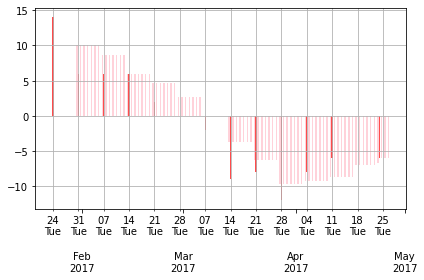

In [51]:
window=21
min_periods=2
title="{} day moving average".format(window)
rpoll['average']=rpoll['spread'].rolling(window, min_periods).mean()
formatPlotBar(start=newstart, end=newend, 
              s1=rpoll['spread'], s2=rpoll['average'],
              s1_label=r_label, s2_label=r_label, 
              s1_color=r_color, s2_color='pink',
              x_label='', y_label=col_to_plot
             )

## Exercise

I'm a big fan of Halloween and Easter – mostly because I love Ghirardelli dark chocolate and it's *way* cheap just after these holidays. I try not to keep the stuff around the house, but like to stock up a bit, opportunisticaly.
Can you help me figure out the schedule? 

Here's how:

- figure out from some arbitrary year (2020, say) the dates of the next 10 occurrences of Easter. The pandas.tseries.holiday collection might help out here.
    
    
- from the same year, figure out the dates of same number of occurances of Halloween. It's on October 31 each year. You'll want to use a DateOffset object for this. Merely using date_range() setting freq="A" won't quite do what you want, but you're encouraged to try.
        
        
- suppose I shop for chocolate for three days around Easter. The next day after, there's a 25% discount, the second day a 50% discount, and by the third day, it's 75% off. The price goes down, but the selection narrows, so I buy 3 pieces each day.
    
    
Can you make a Series object that has the shopping date as the index and money spent as the value for each day of my Easter-related shopping? You can then query the Series for the total cost for all this candy.

Hint: if you want to apply a DateOffset and you have built the original series using the date_range() method, be aware that the dates will be in the form of Timestamp objects. You can use their date() method to convert them to something that can work with a DateOffset.


Finally, for each year, figure out how many days between Halloween and Easter (it varies because Easter is a floating holiday).

Solution: solution_datetime.ipynb


Pandas Database Ops
===================

Comparison of SQL operations and pandas methods
-----------------------------------------------

When we worked with the Real Clear Politics polling data, we were able
to select only certain polls from the original **DataFrame** by using
its **query**() method. You may recall that we were able to make new
**DataFrames** for the Quinnipiac and Rasmussen polls with these
directives:

In [52]:
qpoll = df.query('poll=="Quinnipiac"')
rpoll = df.query('poll=="Rasmussen Reports"')

These simple queries represent the basic SELECT directive. We can make
them more complicated by expanding the "WHERE clause" bit of it. 

For
instance, we can select rows based on multiple criteria like this:

In [53]:
df.query('poll=="Quinnipiac" and spread < -17')

,poll,size,stype,approve,disapprove,spread
date,,,,,,
2017-04-03,Quinnipiac,1171,RV,35,57,-22
2017-03-21,Quinnipiac,1056,RV,37,56,-19


We can provide an "ORDER BY" clause by using **sort\_values**() method
on the DataFrame returned by the **query**() directive. The "**by=**"
can be a single column identifier. Multiple identifiers can be provided
as or a **list** containing several column identifiers.

 Here, the
elements of the **list** are the primary and secondary sort keys.

In [54]:
df.query('poll=="Gallup" and disapprove >= 55').\
          sort_values(by="approve")

,poll,size,stype,approve,disapprove,spread
date,,,,,,
2017-03-28,Gallup,1500,A,35,59,-24
2017-03-21,Gallup,1500,A,40,55,-15


Similarly, one can apply a "GROUP BY" clause by using the **groupby**()
method. 

Here's an example showing the average polling results by
organization:

In [55]:
df.groupby(['poll']).mean()[:4]

,size,approve,disapprove,spread
poll,,,,
ABC News/Wash Post,1004.00,42.0,53.0,-11.0
CBS News,1098.25,40.5,50.0,-9.5
CNBC,804.00,39.0,48.0,-9.0
CNN/ORC,1013.50,44.5,52.5,-8.0


The grouping columns can be a single value, as shown here, or a **list**
when multiply-layered breakdowns are required. Some sort of aggregating
operation needs to be applied when using **groupby**() to return real
data (otherwise a **DatsFrameGroupBy** object gets returned). The
options are numerous and include **min**(), **max**(), **abs**(),
**prod**(), and more.

You can always get the COUNT by using the **count**() method. To get the
count in any of the bins created with **groupby**(), you can pick an
arbitrary column from the **DataFrameGroupBy** object and run the count
method on it. 

Here's how:

In [56]:
print("Total records:  ", df['poll'].count())
df.groupby('poll')['poll'].count()[:4]

Total records:   88


poll
ABC News/Wash Post    1
CBS News              4
CNBC                  1
CNN/ORC               2
Name: poll, dtype: int64

In [57]:
# We'll use this later
clean_poll_df = df.copy()

Creating pivot tables and cross-tabulations
-------------------------------------------

Pivot tables are a handy way of handling complex data aggregation tasks
simply. Sure, you can do deeply-nested **query**() and **groupby**()
commands to drill down through large data sets, but it's easy to lose
transparency when building the requisite code structures. This section
will take you through some of the basic operations. 

Here, we'll use a
database of earthquakes maintained by the U.S. Geological Service.

As usual, we'll begin by importing some data. In the **read\_csv**()
method, we'll use the optional **parse\_dates=** keyword argument to let
pandas know which column(s) contain dates that we'd like it to grok as
**datetime** objects.


https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php 

https://earthquake.usgs.gov/data/comcat/data-eventterms.php\#nst

In [58]:
import pandas as pd
import os

datadir = 'data'
datafile='earthquakes.csv'
    
filename=os.path.join('.', datadir, datafile)
df=pd.read_csv(filename, parse_dates=[0]) 

df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-09-19 16:56:50.540000+00:00,36.020500,-117.765667,1.520,2.45,ml,26.0,61.0,0.004712,0.18,...,2017-09-19T17:24:41.375Z,"16km NE of Little Lake, CA",earthquake,0.26,0.32,0.119,25.0,automatic,ci,ci
1,2017-09-19 16:15:29.900000+00:00,37.510502,-118.833832,2.630,2.92,md,31.0,105.0,0.110700,0.04,...,2017-09-19T16:40:13.504Z,"19km SE of Mammoth Lakes, California",earthquake,0.24,1.00,0.190,31.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2017-09-19 15:27:13.670000+00:00,42.613500,-111.442900,8.340,3.50,ml,NaN,37.0,0.028000,0.40,...,2017-09-19T17:29:15.278Z,"14km ESE of Soda Springs, Idaho",earthquake,1.50,7.30,0.044,68.0,reviewed,us,us
4,2017-09-19 15:26:56.200000+00:00,36.451600,-98.796500,6.125,2.50,ml,NaN,103.0,NaN,0.23,...,2017-09-19T17:26:22.040Z,"34km NW of Fairview, Oklahoma",earthquake,1.10,3.90,NaN,NaN,reviewed,tul,tul


Content aside, the first thing you may notice is that we can't see the whole table.   If we want to see more rows or columns, we can use pd.set_option().

You can look at all of Pandas' options here:  https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html


In [59]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision', 3)

In [60]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-09-19 16:56:50.540000+00:00,36.020,-117.766,1.520,2.45,ml,26.0,61.0,0.005,0.18,ci,ci37766807,2017-09-19T17:24:41.375Z,"16km NE of Little Lake, CA",earthquake,0.26,0.32,0.119,25.0,automatic,ci,ci
1,2017-09-19 16:15:29.900000+00:00,37.511,-118.834,2.630,2.92,md,31.0,105.0,0.111,0.04,nc,nc72895231,2017-09-19T16:40:13.504Z,"19km SE of Mammoth Lakes, California",earthquake,0.24,1.00,0.190,31.0,automatic,nc,nc
2,2017-09-19 15:35:09.030000+00:00,42.617,-111.484,4.520,3.10,ml,NaN,54.0,0.031,0.19,us,us2000aqsh,2017-09-19T17:15:07.040Z,"10km ESE of Soda Springs, Idaho",earthquake,2.40,4.10,0.050,52.0,reviewed,us,us
3,2017-09-19 15:27:13.670000+00:00,42.614,-111.443,8.340,3.50,ml,NaN,37.0,0.028,0.40,us,us2000aqs7,2017-09-19T17:29:15.278Z,"14km ESE of Soda Springs, Idaho",earthquake,1.50,7.30,0.044,68.0,reviewed,us,us
4,2017-09-19 15:26:56.200000+00:00,36.452,-98.796,6.125,2.50,ml,NaN,103.0,NaN,0.23,us,us2000aqwu,2017-09-19T17:26:22.040Z,"34km NW of Fairview, Oklahoma",earthquake,1.10,3.90,NaN,NaN,reviewed,tul,tul


In [61]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

limit_output extension: Maximum message size of 10000 exceeded with 12475 characters

### Removing Unneeded Data

The file contains a ton of information – much of it we don't need here.
We'll use some of pandas built-in methods to clean it up. We can use the
**drop**() method of the **DataFrame** object to enumerate which columns
we want to get rid of – note we're providing a **list** of the victims
as the argument.

The **drop()** method has many forms.  The one we'll use here looks like this:

    df.drop(df.columns[[1, 2, 21]], axis=1, inplace=True)
    
We provide a list of columns to drop.   The 'axis=1' bit tells it to work on columns (axis 0 is rows).  Then we tell it to go ahead and work on the object in situ, without creating a new object.    

In [62]:
df.drop(df.columns[[1,2,5,6,7,8,9,11,12,14,15,16,17,18,20,21]], 
        axis=1, 
        inplace=True)


In [63]:
df.head()

,time,depth,mag,net,place,status
0,2017-09-19 16:56:50.540000+00:00,1.520,2.45,ci,"16km NE of Little Lake, CA",automatic
1,2017-09-19 16:15:29.900000+00:00,2.630,2.92,nc,"19km SE of Mammoth Lakes, California",automatic
2,2017-09-19 15:35:09.030000+00:00,4.520,3.10,us,"10km ESE of Soda Springs, Idaho",reviewed
3,2017-09-19 15:27:13.670000+00:00,8.340,3.50,us,"14km ESE of Soda Springs, Idaho",reviewed
4,2017-09-19 15:26:56.200000+00:00,6.125,2.50,us,"34km NW of Fairview, Oklahoma",reviewed


### Using Accessors To Clean Data

Next, we'll apply a couple of "accessors" – these are bridging objects
between pandas objects and other Python methods. The **str** accessor
provides most of the string methods and the **dt** accessor provides
many of the **datetime** methods.

If you look at the first few rows of the data, you'll see that California appears in the database as "California" and "CA".   We want consistency, so we'll change all the "CA" references to "California".

    df['place']=df['place'].str.replace("CA", "California")
    
The right side is like this:  <cell reference>.<object name>.<method name>(<arguments>)
    
Pandas supports four accessor methods right out of the box.  The 'str' accessor provides methods for operating on string objects - including the ability to apply regular expressions.  The 'cat' accessor has methods for managing categories and categorical indices.  The 'dt' accessor allows manipulation of datetime-like objects. Finally, the 'sparse' accessor has methods for accessing Pandas "sparse" data arrays.
    
It's possible to create your own accessor methods.   The relevant docs are here:    
    
https://pandas.pydata.org/pandas-docs/stable/development/extending.html    

In [64]:
# Coherse the place column into a str object
df['place']=df['place'].astype(str)

# Use the 'str' accessor to massage the place data
df['place']=df['place'].str.split(',').str.get(1)
df['place']=df['place'].str.strip()
df['place']=df['place'].str.replace("CA", "California")

Here, we'll use the 'dt' accessor to peel off the components of the datetime object in the 'time' column, something like this:

    2017-09-19 16:15:29.900000+00:00 
    
... into more easily-wrangled year, month, and day columns.   

In [65]:
# Use 'dt' accessor against the time data

df['year']=df['time'].dt.year
df['mon']=df['time'].dt.month
df['day']=df['time'].dt.day

### Modifying the Index

If we don't tell Pandas any different, it will ingest our data and provide a generic, zero-based integer Index.   Here, we'll probably want to sort on dates so it will be convenient to reassign the index. 

In [66]:
df.set_index('time', inplace=True)

df.head()

,depth,mag,net,place,status,year,mon,day
time,,,,,,,,
2017-09-19 16:56:50.540000+00:00,1.520,2.45,ci,California,automatic,2017,9,19
2017-09-19 16:15:29.900000+00:00,2.630,2.92,nc,California,automatic,2017,9,19
2017-09-19 15:35:09.030000+00:00,4.520,3.10,us,Idaho,reviewed,2017,9,19
2017-09-19 15:27:13.670000+00:00,8.340,3.50,us,Idaho,reviewed,2017,9,19
2017-09-19 15:26:56.200000+00:00,6.125,2.50,us,Oklahoma,reviewed,2017,9,19


### Make a Pivot Table

Creating a pivot table is pretty easy. All that's required is a
**DataFrame** and one or more indices to define the groupings. 

Here,
we're providing three index names in the form of a **list** object.

In [67]:
pt_indices = ['place', 'year', 'mon']

pt=pd.pivot_table(df, index=pt_indices)
pt.head()

day    depth    mag
place       year mon                        
Afghanistan 2017 8    28.000  166.585  4.600
                 9     4.000  210.800  4.400
Alaska      2017 8    26.246   48.301  3.018
                 9     9.679   52.424  3.045
Albania     2017 9    18.000   16.320  4.300

The order of the indices determines the order of the groupings applied.


In [68]:
#  To rearrange the groupings, simply reorder the indices
pt_indices = ['place', 'year', 'mon']
pt = pd.pivot_table(df, index=['mon', 'place', 'year'])
pt.head()

day    depth    mag
mon place          year                        
8   Afghanistan    2017  28.000  166.585  4.600
    Alaska         2017  26.246   48.301  3.018
    American Samoa 2017  21.000   10.000  5.300
    Argentina      2017  22.000  215.903  4.300
    Bonaire        2017  21.000   39.000  2.570

You've got granular control over what information gets displayed and to what level of aggregation. Let's say you want to "roll up" the data and figure out how many earthquakes happened, and their average magnitude, by place name. 

You could do something like:

In [69]:
pt=pd.pivot_table(df, 
                  index=['place'],
                  values=['mag'], 
                  aggfunc=[np.mean, len]
                 )
pt

,mean,len
,mag,mag
place,,
Afghanistan,4.533,3.0
Alaska,3.034,283.0
Albania,4.300,1.0
American Samoa,5.300,1.0
Argentina,4.277,13.0
B.C.,3.043,3.0
Barbados,4.600,1.0
Barbuda,4.400,1.0


The pivot tables themselves are DataFrame objects.  The pivot table methods essentially add new indices, but they are just DataFrames so you can use the **query()** command on them. 

This example produces a list of all the magnitude 4 and above quakes in Oregon and California:


In [70]:
pt=pd.pivot_table(df, index=['place', 'year', 'mon', 'day', 'depth'])
pt.query("place == ['Oregon', 'California'] and mag > 4")

mag
place      year mon day depth      
California 2017 8   22  6.14   4.07
Oregon     2017 8   27  10.00  4.30
                9   5   10.00  4.30

### Crosstabs 

Crosstabs are a snap with pandas. 

To illustrate, let's begin by creating some classifications ("bins") for the magnitude and depth of the earthquakes. One way to do that is to use pandas' **cut()** method. To accomplish this, we want to:

    - create categorical bins (of any size)
    
    - create labels (one per bin)
    
    - apply cut()


In [71]:
cut_offs = [0, 4, 6, 8, 10]
names = ['weak', 'moderate', 'strong', 'intense']

df['strength'] = pd.cut(df['mag'], cut_offs, labels=names)
df.head()

,depth,mag,net,place,status,year,mon,day,strength
time,,,,,,,,,
2017-09-19 16:56:50.540000+00:00,1.520,2.45,ci,California,automatic,2017,9,19,weak
2017-09-19 16:15:29.900000+00:00,2.630,2.92,nc,California,automatic,2017,9,19,weak
2017-09-19 15:35:09.030000+00:00,4.520,3.10,us,Idaho,reviewed,2017,9,19,weak
2017-09-19 15:27:13.670000+00:00,8.340,3.50,us,Idaho,reviewed,2017,9,19,weak
2017-09-19 15:26:56.200000+00:00,6.125,2.50,us,Oklahoma,reviewed,2017,9,19,weak


If the classification logic needs to be more complicated, it's possible to build a classifier routine and process a column of data through it – much like you can build a function to do a customized **sort()** on a list object. 

To use it, call pandas' **apply()** method with the appropriate parameters like so:


In [72]:
def classify(data_row):
    "Classify earthquakes depths"
    
    # Target the 'depth' column
    depth=data_row['depth']
    
    # Manually define categorical labels
    if depth < 10:     
        return 'surface'
    elif depth < 100:  
        return 'shallow'
    elif depth < 1000: 
        return 'kinda deep'
    else:              
        return 'really deep'

# Use **apply()** to create a new column using row-wise modifications
df['deep_cat']=df.apply(classify, axis=1)

df.head()

,depth,mag,net,place,status,year,mon,day,strength,deep_cat
time,,,,,,,,,,
2017-09-19 16:56:50.540000+00:00,1.520,2.45,ci,California,automatic,2017,9,19,weak,surface
2017-09-19 16:15:29.900000+00:00,2.630,2.92,nc,California,automatic,2017,9,19,weak,surface
2017-09-19 15:35:09.030000+00:00,4.520,3.10,us,Idaho,reviewed,2017,9,19,weak,surface
2017-09-19 15:27:13.670000+00:00,8.340,3.50,us,Idaho,reviewed,2017,9,19,weak,surface
2017-09-19 15:26:56.200000+00:00,6.125,2.50,us,Oklahoma,reviewed,2017,9,19,weak,surface


Now we can have a look at our newly-classified data as a cross-tab. 

In [73]:
# First arg is rows.  The margins paramater toggles the row/column totals.
pd.crosstab(df.strength, columns= df.deep_cat, margins=True )

deep_cat,kinda deep,shallow,surface,All
strength,,,,
weak,59,421,540,1020
moderate,127,487,42,656
strong,1,1,2,4
intense,0,1,0,1
All,187,910,584,1681


If you want to get a little fancier, you can do nested breakdowns by
providing a **list** instead of a single value for one or both of the
rows and columns. 

This example breaks things down by months:

In [74]:
pd.crosstab([df.mon, df.strength], columns= df.deep_cat, margins=True )

deep_cat      kinda deep  shallow  surface   All
mon strength                                    
8   weak              19      186       91   296
    moderate          61      139        9   209
    strong             0        1        1     2
9   weak              40      235      449   724
    moderate          66      348       33   447
    strong             1        0        1     2
    intense            0        1        0     1
All                  187      910      584  1681

You can nest these by providing lists to both the row and column specifications.

In [75]:
pd.crosstab([df.mon, df.strength], columns= [df.deep_cat, df.year], margins=True )

deep_cat     kinda deep shallow surface   All
year               2017    2017    2017      
mon strength                                 
8   weak             19     186      91   296
    moderate         61     139       9   209
    strong            0       1       1     2
9   weak             40     235     449   724
    moderate         66     348      33   447
    strong            1       0       1     2
    intense           0       1       0     1
All                 187     910     584  1681

Aggregating Data Across Different Tables
----------------------------------------

It's common to have data scattered across different container objects –
sometimes by design (keeping data atomic), and sometimes simply due to
the fact that they are gathered from different sources at different
times. In either case, you'll likely have the need to pull it together
to support your analysis. There are a few ways to do that with
**DataFrame** objects. 

Let's create some simple data:

In [76]:
col_index=['c1', 'c2', 'c3']
row_index=[1,2]
ff=pd.DataFrame([[11,12,13],[21,22,23]], 
                columns=col_index,
                index=row_index)
ff

,c1,c2,c3
1,11,12,13
2,21,22,23


In [77]:
col_index=['c2', 'c3', 'c4']
row_index=[2,3]
gf=pd.DataFrame([[911,912,913],[921,922,923]], 
                columns=col_index,
                index=row_index)
gf

,c2,c3,c4
2,911,912,913
3,921,922,923


If we study these briefly, we may notice that:

    - The two tables both have columns c2 and c3, and each has a unique column
    
    - The two tables both have row 2, and each has a unique row.
    
This will be material when we "shuffle the deck".

We'll begin by putting them together horizontally and vertically using **concat()**.  Specification of the axis parameter determines which.

In [78]:
horizontal = pd.concat([ff, gf], axis=1)
horizontal

,c1,c2,c3,c2,c3,c4
1,11.0,12.0,13.0,NaN,NaN,NaN
2,21.0,22.0,23.0,911.0,912.0,913.0
3,NaN,NaN,NaN,921.0,922.0,923.0


In [79]:
vertical = pd.concat([ff, gf], axis=0)
vertical

,c1,c2,c3,c4
1,11.0,12,13,NaN
2,21.0,22,23,NaN
2,NaN,911,912,913.0
3,NaN,921,922,923.0


You'll note a couple of things. 

    - **concat**() operation just crams them together, duplicating rows/columns
        
    - mis-matched cells got a NaN
    
This result is problematic because you can get ambiguous results when you select data:

In [80]:
horizontal['c2']

,c2,c2
1,12.0,NaN
2,22.0,911.0
3,NaN,921.0


Merge works well if you're combining "like" data.   As you can see, it may require cleanup.

A more "intelligent" way to combine two data objects may be to use database-like joins using the **merge**() method. 

Joins come in different flavors. 

    - inner join - reports only the common rows that the two
      
    - outer join - reports a superset of all the rows filling in **np.NaNs** 
    
        - left outer join - reports all 'left' and only matching 'right' data
        
        - right outer join - reports all 'right' and only matching 'left' data

Let's play around with some made-up polling data for illustrative
purposes. Here are some approval/disapproval ratings:

In [81]:
poll_cols = ['poll', 'approve', 'disapprove']
poll_data = [['ABC News/Wash Post', 30, 60],
             ['CBS News',           35, 45],
             ['Breitbart',          90,  5],
             ['InfoWars',          200,  0]]
poll_df = pd.DataFrame(poll_data, columns=poll_cols)
poll_df

,poll,approve,disapprove
0,ABC News/Wash Post,30,60
1,CBS News,35,45
2,Breitbart,90,5
3,InfoWars,200,0


And here are some made-up qualitative evaluations on the polls and polling
organizations themselves:

In [82]:
eval_cols = ["org", "eval"]
eval_data = [['ABC News/Wash Post', 'SAD'],
             ['CBS News',           "FAILED!!"],
             ['Breitbart',          'Enlightened'],
             ['CNBC',               'Fake News!']]
eval_df = pd.DataFrame(eval_data, columns=eval_cols)
eval_df

,org,eval
0,ABC News/Wash Post,SAD
1,CBS News,FAILED!!
2,Breitbart,Enlightened
3,CNBC,Fake News!


### Inner Join

To create an inner join (the one that reports only the rows that match
up) we just tell it what **DataFrames** to use and which columns to use
as "matchers":

In [83]:
inner = pd.merge(left=poll_df, 
                 right=eval_df, 
                 left_on='poll', 
                 right_on='org')
inner

,poll,approve,disapprove,org,eval
0,ABC News/Wash Post,30,60,ABC News/Wash Post,SAD
1,CBS News,35,45,CBS News,FAILED!!
2,Breitbart,90,5,Breitbart,Enlightened


You can see that the "CNBC" row dropped out. The new object has
all the columns from both input **DataFrames**. Thus, we've created an
object that is a superset of everything we know that's common to both
data objects.

### Left Outer Join

Now let's try the one where we snag everything from the left object and
fill in what we can from the right-hand one (the "left outer" join). 

The only substantive difference is that we included a "**how = 'left'**" keyword argument:

In [84]:
left_outer=pd.merge(left=poll_df, 
                    right=eval_df, 
                    left_on='poll', 
                    right_on='org', 
                    how='left')
left_outer

,poll,approve,disapprove,org,eval
0,ABC News/Wash Post,30,60,ABC News/Wash Post,SAD
1,CBS News,35,45,CBS News,FAILED!!
2,Breitbart,90,5,Breitbart,Enlightened
3,InfoWars,200,0,NaN,NaN


You can see that it politely filled in "NaN" (the **np.NaN** object) on
the right when it got confused. The other flavors of join work the same
way – you just have to include the correct "**how =** " directive.

### Right Outer Join


Here's the right outer join:

In [85]:
right_outer=pd.merge(left=poll_df, right=eval_df, left_on='poll', 
                     right_on='org', how='right')
right_outer

,poll,approve,disapprove,org,eval
0,ABC News/Wash Post,30.0,60.0,ABC News/Wash Post,SAD
1,CBS News,35.0,45.0,CBS News,FAILED!!
2,Breitbart,90.0,5.0,Breitbart,Enlightened
3,NaN,NaN,NaN,CNBC,Fake News!


Here, all the information from the right table is included, and whatever
it could find in the left table. 

### Full Outer Join

The outer join is the pretty much the
same as a horizontal **merge**() from above – it's a "kitchen sink"
operation that throws everything from both input objects into the same
new **DataFrame**.

In [86]:
full_outer=pd.merge(left=poll_df, right=eval_df, left_on='poll', 
                    right_on='org', how='outer')
full_outer

,poll,approve,disapprove,org,eval
0,ABC News/Wash Post,30.0,60.0,ABC News/Wash Post,SAD
1,CBS News,35.0,45.0,CBS News,FAILED!!
2,Breitbart,90.0,5.0,Breitbart,Enlightened
3,InfoWars,200.0,0.0,NaN,NaN
4,NaN,NaN,NaN,CNBC,Fake News!


Creating complex queries with intermediate data frame objects
-------------------------------------------------------------

Like SQL statements, pandas’ equivalent operations can be sequentially
applied to intermediate operations, but the syntax is much more
transparent IMHO. Instead of having to come with a bunch transient
objects with disambiguating scratch names, you can perform serial
operations on a morphing object. 

You're spared syntax like:

     SELECT a.name FROM (SELECT name FROM agentinformation)

You've already seen operations where we've fed the results of one
**DataFrame** operation into another **DataFrame** method (that's one of
the advantages of using the same fully-functional object type at each
step).

As a final illustration of pandas' powers, have a look at this small bit
of code. 

It uses the original polling data "df" and:

    - performs a right join on the evaluation **DataFrame** (the one with "Fake News!", etc.);
    
    - queries the results of the join for approval rates above 40;
    
    - aggregates the results by the polling organization;
    
    - calculates the mean approval rating by organization; 
    
    - does two-stage sort with the spread as the primary key and the size secondary key.

In [87]:
clean_poll_df

,poll,size,stype,approve,disapprove,spread
date,,,,,,
2017-04-24,Rasmussen Reports,1500,LV,47,53,-6
2017-04-23,Gallup,1500,A,40,54,-14
2017-04-20,ABC News/Wash Post,1004,A,42,53,-11
2017-04-20,NBC News/Wall St. Jrnl,900,A,40,54,-14
2017-04-18,PPP (D),648,RV,43,50,-7
2017-04-18,Economist/YouGov,1291,RV,44,50,-6
2017-04-18,Quinnipiac,1062,RV,40,56,-16
2017-04-17,Reuters/Ipsos,1843,A,43,52,-9
2017-04-12,Marist,869,RV,39,49,-10


limit_output extension: Maximum message size of 10000 exceeded with 15107 characters

In [88]:
pd.merge(left=clean_poll_df, right=eval_df, 
         left_on='poll', 
         right_on='org', 
         how='right').\
                       query("approve>40").\
                       groupby("poll").mean().\
                       sort_values(by=["spread", "size"])

,size,approve,disapprove,spread
poll,,,,
ABC News/Wash Post,1004.0,42.0,53.0,-11.0
CBS News,1006.0,43.0,49.0,-6.0


Not bad, eh? All in what could be a single line of code. And most
importantly (IMHO) in a really transparent, easy-to-explain fashion.

That's it for the basics of how to wrangle pandas objects. 

## Exercise

Let's do a little more exploration of the earthquake data – you can build on py_pandas_pivot_tables.ipynb, if you would like. You might go ahead and drop columns 1 (latitude), 2 (longitude), 10 (name of reporting network, and 19 (type of report).

Some people believe that recent seismic activity in the historically-mellow region around Oklahoma City is likely caused by the popularity of hydrostatic fracturing1 ("fracking").
Earthquakes in California, on the other hand, are generally caused by plate tectonics (large chunks of the Earth's crust slipping past each other).


Given the different causality, one might expect these quakes would have different characteristics. But do they?
Another interesting question might be is there any temporal relationshop – maybe due to a common cause like gravitational / tidal influences of the moon – or a quake in one place causing a quake in the other place?


Please have a look at the magnitude ("mag") and depth ("depth") of quakes in these two regions and see what you can find out.


Here's how you might go about it:

    - create separate objects to represent Oklahoma and California quakes
    - use describe() and see if anything jumps out as different
    - create some plots to visualize differences in earthquake depths and magnitudes
    - create and plot time series to "eyeball" the temporal relationship (if any). You'll need to reindex both. A couple tricks:
    
Since there are NaN values, plotting a line won't work unless you tell it to plot a marker. It's an extra argument to plt.plot() – something like:

    plt.plot(x_plot, ok_plot ,'o-')

If you're doing a bar chart with time on the x-axis, you have to give it numeric values for the datetime objects in the DataFrame index. You can use matplotlib.dates.date2num() to do the conversion, like this:

    import matplotlib.dates as dates
    x_as_datetime = ser.index
    x_as_floats = dates.date2num(x_as_datetime)
    x_plot = x_as_floats
    
…assuming you're plotting ser and using x_plot for the x-axis values, something like:

    plt.bar(x_plot, serok_plot, color = 'b', width = .01)
    

Feel free to copy, past, modify, steal, pilliage, plageurize, and otherwise make use of the materials we've covered so far. No need to reinvent too many wheels.

You can use the file "starter_kit_database_ops.ipynb" if you want – it contains logic to import and clean up the data, most of which we've already covered. 

The only exception is near the bottom:

    #round to nearest minute and de-dup
    df['time'] = df['time'].dt.round('min')
    df = df.drop_duplicates('time')
    #make time the index
    df.set_index('time', inplace = True)

This "rounds" the time stamps to the nearest minute, making the data much more tractable.

Rounding shouldn't affect the analysis since the fastest seismic waves travel through the crust is about 13 km/sec3 (780 km/min) and the distance between Oklahoma City and LA is about 2930 km.

However, this produces potential duplicates, though, which screw up the reindexing – we need to get rid of them with the drop_duplicates() method.

https://www.forbes.com/sites/jamesconca/2016/09/07/the-connection-between-earthquakes-and-fracking/#13e0e3ff6d68

http://news.nationalgeographic.com/news/2014/03/140310-earthquakes-usgs-california-faults-science/
https://en.wikipedia.org/wiki/Seismic_wave   

Pandas + Machine Learning Tools
===============================

This purpose of this chapter is to introduce you to the scikit-learn
library's linear discriminant analysis (LDA) modeling tool. The library
also includes a quadratic version which can find more granular
solutions, and which operates the same way.

What is LDA?
------------

LDA is a form of Bayesian classification. It attempts to determine which
general class each newly-encountered case belongs in based on prior
knowledge about other members of the class and the observed
characteristics of the new case.

The LDA method works to create linear combinations of the features in as
many dimensions as specified. In this sense it's a data reduction
method. The linear combinations are optimized to create as much
among-classes separation as possible while minimizing the within-class
variance.

From a slightly more technical perspective,  it models the membership in each class:

P(X|y=k)

...as a multivariate Gaussian distribution. X is the IV vector, y is the DV, k is the class. Using Bayes' transformation, we can use priors:

[ P(X|y=k) * P(y=k) ] / [ SUM_over_i { P(X|y=i) * P(y=i)  } ]


https://en.wikipedia.org/wiki/Linear_discriminant_analysis
http://scikit-learn.org/stable/modules/lda_qda.html

Getting to Know the Data
------------------------

For this section we'll use Ronald Fisher's classic iris database of 150
observations of sepal and petal length / width in three types of irises.

Fisher is widely considered to be the father of modern statistics –
inventing, among many other things, LDA. 

The first couple lines of
'iris.data.csv', found in your class files folder look like this:

    slength,swidth, plength, pwidth, iclass
    5.1,3.5,1.4,0.2,Iris-setosa

We can use the pandas **read\_csv**() method to acquire the data. For
convenience, we'll assign the dependent variables and independent
variable object names.

In [89]:
# Some boilerplate imports
import numpy as np             
import pandas as  pd    
import os
import scipy
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import matplotlib.dates as dates #date munging
import csv
import datetime
import math
%matplotlib inline

In [90]:
path = 'data'
datafile = 'iris.data.csv'

filename = os.path.join(path, datafile)
df = pd.read_csv(filename, parse_dates=[0])

# Set some names for the dependent and independent variables
iv_names = ['slength', 'swidth', 'plength', 'pwidth']
dv_name = 'iclass'

df.head()

,slength,swidth,plength,pwidth,iclass
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



A new data set can be regarded as an exciting adventure – traveling to a
new country, going on a first date, learning a new language. To make the
most of the experience, you want to roll in the data – you want to
regard it as a golden retriever regards a pile of fully-mature, dead
fish. 

Not just a body-wash but a breath mint, too!

This section will show you a few ways you can proceed with the
adventure. 


In [91]:
df.describe()

,swidth,plength,pwidth
count,150.000,150.000,150.000
mean,3.054,3.759,1.199
std,0.434,1.764,0.763
min,2.000,1.000,0.100
25%,2.800,1.600,0.300
50%,3.000,4.350,1.300
75%,3.300,5.100,1.800
max,4.400,6.900,2.500


Since we're doing a classification exercise, it makes sense to analyze the data by category.   Pandas has a method which makes that easy:

In [92]:
auto_cats = pd.Categorical(df['iclass'])
auto_cats.describe()

,counts,freqs
categories,,
Iris-setosa,50,0.333
Iris-versicolor,50,0.333
Iris-virginica,50,0.333


We can also have a look at pair-wise plots of attributes. 

This example looks at the relationship between sepal lengths and widths for the
different iris classes. 

Text(0.5, 1.0, 'scatter')

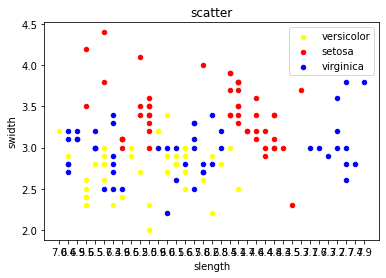

In [93]:
ax = df[df.iclass == 'Iris-versicolor'].\
            plot.scatter(x = 'slength', 
                         y = 'swidth',
                         color = 'yellow', 
                         label = 'versicolor')

df[df.iclass == 'Iris-setosa'].\
            plot.scatter(x = 'slength', 
                         y = 'swidth',
                         color = 'red', 
                         label = 'setosa',
                         ax = ax)

df[df.iclass =='Iris-virginica'].\
            plot.scatter(x = 'slength', 
                         y = 'swidth',
                         color = 'blue', 
                         label = 'virginica',
                         ax = ax)

ax.set_title("scatter")


If you find scatter plots like this useful (I certainly do), there's
also a wrapper method in the pandas tools.plotting library,
**scatter\_matrix**(). It systematically does pair-wise combinations of
everything you can think of and displays all the scatter plots in one
object. It's a simple 'one-liner'. By default the diagonals are
histograms, but there are other options available:

array([[<AxesSubplot:xlabel='swidth', ylabel='swidth'>,
        <AxesSubplot:xlabel='plength', ylabel='swidth'>,
        <AxesSubplot:xlabel='pwidth', ylabel='swidth'>],
       [<AxesSubplot:xlabel='swidth', ylabel='plength'>,
        <AxesSubplot:xlabel='plength', ylabel='plength'>,
        <AxesSubplot:xlabel='pwidth', ylabel='plength'>],
       [<AxesSubplot:xlabel='swidth', ylabel='pwidth'>,
        <AxesSubplot:xlabel='plength', ylabel='pwidth'>,
        <AxesSubplot:xlabel='pwidth', ylabel='pwidth'>]], dtype=object)

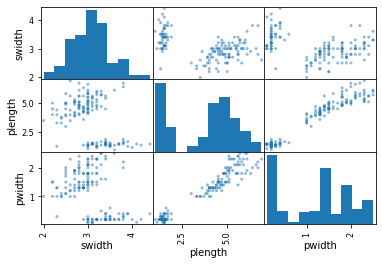

In [94]:
pd.plotting.scatter_matrix(df)

This gets the same information using Seaborn, another visualization
library, tapping its **pairplot**() method. The default diagonal
elements are line graphs of the distributions of the different iris
types.

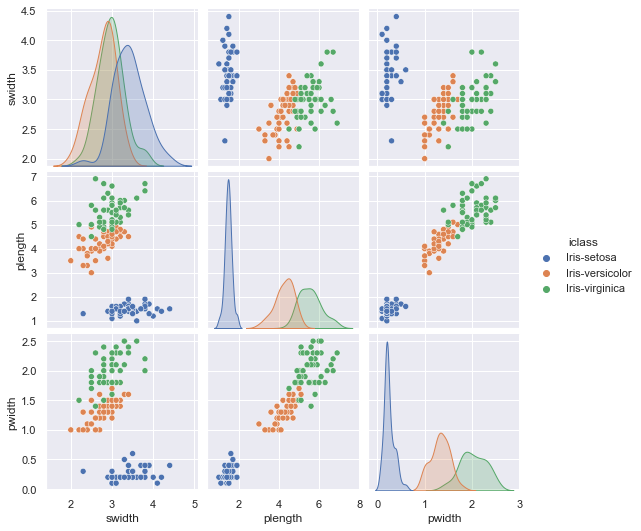

In [95]:
import seaborn as sns

sns.set()
sns.pairplot(df[['slength', 'swidth', 'plength', 'pwidth', 'iclass']],
hue = "iclass",
diag_kind = "kde")


This just scratches the surface of what you can do quickly and easily to
get your arms around a new data set. Exploration is encouraged!

Exploring Data Integrity
------------------------

The next thing we'll want to do is check to see if the assumptions
around the data for this method are met. Theoretically, the data should
be distributed multivariate normal and each class should have the same
variance.

We'll do a partial check here and test if each class is univariate
normal. We'll accomplish this by applying "D'Agostino's K-squared test".
This sizes up the shape of the distribution based on adding up the
square of the z-score of a test for skewness and the square of the
z-score of a test for kurtosis. In other words, if the distribution is
leaned too far 'left or right', or if the tails are too thick or thin,
this metric gets dinged. Because the both skew and kurtosis metrics are
squared, the penalty grows quickly as either gets out-of-spec.

This test is implemented as part of the scipy.stats library as a method
called **normaltest**(). This method produces a **tuple** of (statistic,
p) – we'll evaluate the p-value to determine whether the test passed. As
a rule of thumb, we're looking for p  .05 (a 95% likelihood that the
distribution is normal, in this case).

The logic simply loops over each of the independent variables,
calculates the figure of merit, evaluates the p-value against the target
and reports the results:

In [96]:
import scipy
import math
from matplotlib import pyplot as plt

p_target = .05

for iv in iv_names:
    test = 'scipy.stats.to_numeric() test for normalicy'
    data = pd.to_numeric(df[iv])
    data = data
    statistic, p = scipy.stats.normaltest(data)
    if p > p_target:
        result = "failed"
    else: 
        result = "passed"

    print(f"{test} at {p_target} {result} for {iv}.  p-value = {p:.3f}.")

scipy.stats.to_numeric() test for normalicy at 0.05 failed for slength.  p-value = 0.057.
scipy.stats.to_numeric() test for normalicy at 0.05 failed for swidth.  p-value = 0.167.
scipy.stats.to_numeric() test for normalicy at 0.05 passed for plength.  p-value = 0.000.
scipy.stats.to_numeric() test for normalicy at 0.05 passed for pwidth.  p-value = 0.000.


As you can see, we're batting .500 on our 'features' (another name for
independent variables). But our data set is pretty large (n=150) so it
might not be horrible.

Let's get a visual. We can do so easily by tapping into another
component of the scipy.stats library, **probplot**(). This method is
clever enough to produce a visual comparison between the actual and
ideal cumulative density functions for each of our features. This code
invokes **probplot**() for each and displays them in a single chart
object. As you'll see, most of the code is bookkeeping for placing the
individual graphs – it's otherwise pretty straightforward.

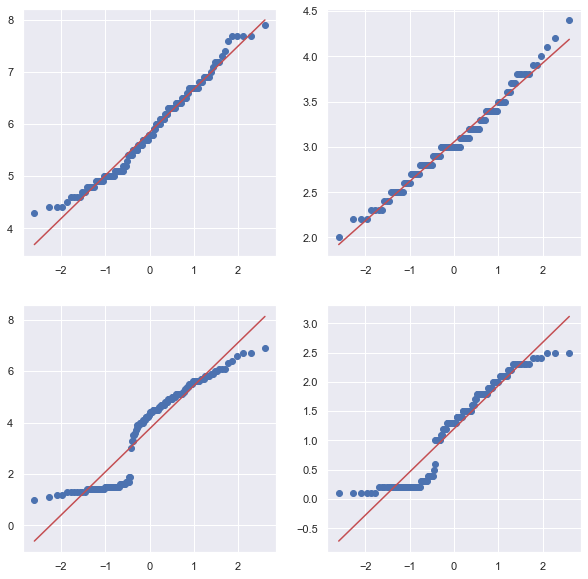

In [97]:
cols = 2
rows = math.ceil(len(iv_names)/cols)

# create a plot object
figure = plt.figure()
figure.set_size_inches(10,10)
# loop over our data vectors and create Q-Q charts for each
row = 1
col = 1
subplot = 1
for iv in iv_names:
    data = pd.to_numeric(df[iv])
    plt.subplot(rows, cols, subplot)  # create the subplot
    scipy.stats.probplot(data, plot=plt)  # stuff it w/ data
    #plt.title(iv)  # give it a nice title
    # reset indices
    col += 1
    if cols:
        col = 1
        row += 1
        subplot += 1

As we already know, 'slength' and 'swidth' (the sepal dimensions) and nicely behaved – the petals not so much.  But we do have a better sense of the extent of the issue.

But for now, we'll let it ride because they're not \*that\* aberrant and
– who knows? We might get credible results anyway. We'll just keep the
normalcy stats in mind in case it's material later.

The next step will be to work on our data set a bit. We're generally in
really good shape – the only thing needed is to change the class labels
like 'Iris-setosa' to category numbers like 1..3. As you've probably
guessed, pandas has that covered, too.

This code applies the pandas pd.Categorical.**from**\_**array**() method
to the 'iclass' column, creating a new **Series** object in the process.
Then it adds the new **Series** to the original **DataFrame** using the
same syntax one would use to add an element to a **dict**.

In [98]:
iclass_ix = pd.Categorical(df[dv_name]).codes
df['iclass_ix'] = iclass_ix

Applying the LDA Model
----------------------

Having checked out our data, we now need to run the analysis routine. We
import the correct modeling component into our namespace and create an
instance of it, then run it in two steps in the code below.

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of the LDA object
lda = LDA(n_components = 2)

# Tell it what to work on
raw_data = df[iv_names].values

# Set the analysis in motion
lda_result = lda.fit(raw_data, iclass_ix)

# Get a human-readable result (projection to X, Y)
lda_result = lda_result.transform(raw_data)
lda_result

array([[ 8.0849532 ,  0.32845422],
       [ 7.1471629 , -0.75547326],
       [ 7.51137789, -0.23807832],
       [ 6.83767561, -0.64288476],
       [ 8.15781367,  0.54063935],
       [ 7.72363087,  1.48232345],
       [ 7.23514662,  0.3771537 ],
       [ 7.62974497,  0.01667246],
       [ 6.58274132, -0.98737424],
       [ 7.36884116, -0.91362729],
       [ 8.42181434,  0.67622968],
       [ 7.24739721, -0.08292417],
       [ 7.35062105, -1.0393597 ],
       [ 7.59646896, -0.77671553],
       [ 9.86936588,  1.61486093],
       [ 9.18033614,  2.75558626],
       [ 8.59760709,  1.85442217],
       [ 7.7995682 ,  0.60905468],
       [ 8.1000091 ,  0.99610981],
       [ 8.04543611,  1.16244332],
       [ 7.52046427, -0.156233  ],
       [ 7.60526378,  1.22757267],
       [ 8.70408249,  0.89959416],
       [ 6.26374139,  0.46023935],
       [ 6.59191505, -0.36199821],
       [ 6.79210164, -0.93823664],
       [ 6.84048091,  0.4848487 ],
       [ 7.948386  ,  0.23871551],
       [ 8.01209273,

This approach can be a little weird if you're used to SAS or SPSS
syntax. We don't just execute a PROC. Instead we need a new instance of
an object (actually a complex class). Then we have to execute the right
methods. And remember to pass along the correct arguments. What could
possibly go wrong ;-)

Also, you'll note that everything happens to and within that object. So
if we want to get results, we'll have to talk to the object again:

In [100]:
mean_success_rate = lda.score(raw_data, iclass_ix)
mean_success_rate

0.98

Here, we've asked it to tell us its 'hit rate' on correct classification
with the **score**() method. We're batting .980 – not too bad.

We've also asked it for vectors of (x, y) projections for the reduced
data so we can plot it. Here's some code that will accomplish the
visualization job:

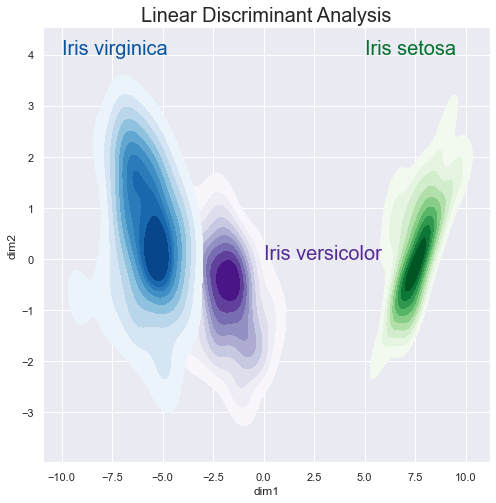

In [101]:
# Add the results to our DataFrame
df['dim1'] = lda_result[:, 0]
df['dim2'] = lda_result[:, 1]

# Query for the separate iris classes
setosa = df.query("iclass=='Iris-setosa'")
versicolor = df.query("iclass=='Iris-versicolor'")
virginica = df.query("iclass=='Iris-virginica'")

# Get a plot object
figure = plt.figure()
figure.set_size_inches(8,8)


# These are color pallattes known to seaborn (lots of other options)
color1 = "Greens"; color2 = "Purples"; color3 = "Blues"

ax = sns.kdeplot(setosa.dim1, y=setosa.dim2, cmap = color1,
                 shade = True, thresh=.05)

ax = sns.kdeplot(versicolor.dim1, y=versicolor.dim2, cmap = color2,
                shade = True, thresh=.05)

ax = sns.kdeplot(virginica.dim1, y=virginica.dim2, cmap = color3,
                 shade = True, thresh=.05)

# Create some labels; this picks off the darkest color of each palatte
color1 = sns.color_palette(color1)[-1]
color2 = sns.color_palette(color2)[-1]
color3 = sns.color_palette(color3)[-1]

# This places text (x, y, text, color, font size)
ax.text(5, 4, "Iris setosa", color = color1, size = 20)
ax.text(0, 0, "Iris versicolor", color = color2, size = 20)
ax.text(-10, 4, "Iris virginica", color = color3, size = 20)

# Second arg is a dict that can contain lots of font specs
ax.set_title('Linear Discriminant Analysis', {'fontsize':20})
iv_names = ['slength', 'swidth', 'plength', 'pwidth']
dv_name = 'iclass'

So it looks like we nailed the classification problem. But, really,
we're cheating.

Yep. We've created an "accurate" model that works well for this data
set, but have no expectation it will work on any other. Very likely,
we've created a model that's so well- tuned for our 150 irises that it
won't do well on a different set of newly-encountered flowers. And
that's not the end-game we're after, is it?

We really want to split our data set, train the model on part of the
data, then test it out on the remainder. You can split your data using
any technique you want (take every other row, say). The Scikit-Learn
library has a built-in method in its cross\_validation library,
**train\_test\_split**(), to make this easy. Just give it a fraction as
an argument, and that will be the fraction of cases placed in the test
set; give it an integer, and that many cases will be in the test set:

In [102]:
from sklearn.model_selection import train_test_split

# We could do this manually, but it's built-in. ".5" makes a 50/50 split
train, test = train_test_split(df, test_size = .5)

Next, we'll create the two objects to hold our chunks of data. Here,
we've also created two separate indices – not necessary, but it may keep
the code a bit more transparent:

In [103]:
# Parse out the training data a bit
train_data = train[['slength', 'swidth', 'plength', 'pwidth']].values
train_class_ix = train['iclass_ix']

# Parse out the test data
test_data = test[['slength', 'swidth', 'plength', 'pwidth']].values
test_class_ix = test['iclass_ix']

# Use fit() to produce component vectors
train_result = lda.fit(train_data, train_class_ix)
tlda_result = train_result.transform(train_data)

In [104]:
# So, how did we do? This time using test data against trained model
train_success_rate = train_result.score(train_data, train_class_ix)
print(f"Training success rate: {train_success_rate:.2f}")

test_success_rate = train_result.score(test_data, test_class_ix)
print(f"Test success rate ('naive' data): {test_success_rate:.2f}")

Training success rate: 0.96
Test success rate ('naive' data): 0.99


OK. So we've got a really well-behaved model based on the test data
alone. The "money shot", however, is to use the trained model (called
'train\_result') against the date we've withheld (called 'test\_data').

Still pretty respectable. There's a strong case for declaring success
here ... that is if we're really just classifying irises, and not
controlling a nuclear reactor or running an air traffic control system.

Quick Recap of the Analysis
---------------------------

To recap, here are the steps we took to analyze Fisher's iris data. Yes,
there are several steps involved but most of them involve an analytical
and contemplative assessment of the data and gut-checking the
reasonableness of the input and output. Powerful tools to accomplish
this lay at your feet. Here's what we did:

> \- imported the data using the **pd.read\_csv**() method;
>
> \- ran descriptive statistics using the **df.describe**() method;
>
> \- plotted the data with tools like **matplotlib.pyplot**(),
> **pd.tools.plotting.scatter\_matrix**() and **searborn.pairplot**()
>
> \- created a categorical variable for the dependent variable (iris
> type) using p**d.Categorical**() method;
>
> \- tested distributional assumptions around the independent variables
> using tools like **scipy.stats.normaltest**() and
> **scipy.stats.probplot**();
>
> \- generated data sets, one for training and the other for testing
> with the **train\_test\_split**() tool from the
> **sklearn.cross\_validation** library;
>
> \- created a LDA model against the training data set using the
> **LinearDiscriminantAnalysis**(), tool from the
> sklearn.discriminant\_analysis library, along with its **fit**() and
> **transform**() methods;
>
> \- reviewed the training results using the **score**() method;
>
> \- ran the trained model against the "naïve" testing data.
>
> \- reviewed the model performance against the testing data.

Monte Carlo Simulation
======================

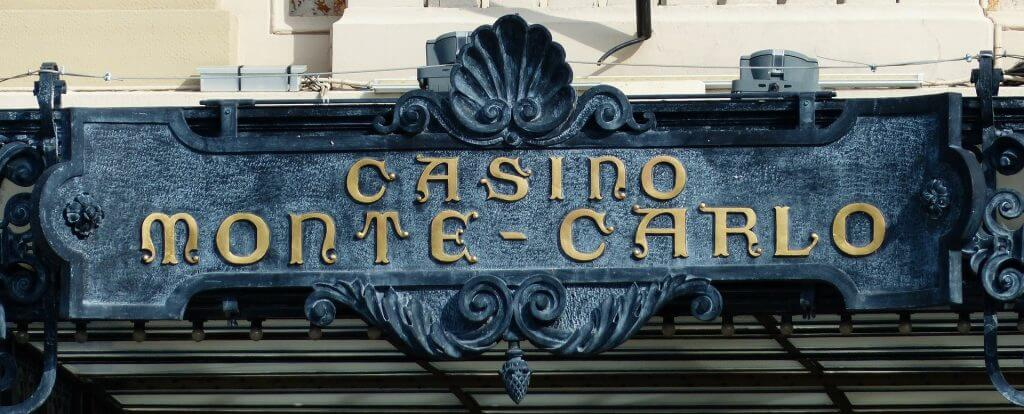

## Basics

Monte Carlo simulation is a general term for introducing the notion of uncertainty into statistical estimations.

The fundamentals were developed by nuclear researchers at Los Alamos National Laboratory to simulate the yield from nuclear weapons.

Michael McKay created a method called "Latin Hypercube Sampling" that allows for systematic sampling for the values of several variables, each from their own distributions, to characterize an uncertain input space.

https://en.wikipedia.org/wiki/Latin_hypercube_sampling

For now, we'll do a simple model of uncertainty.

In [105]:
import numpy as np
import pandas as pd

## A Casino Application

Let's say we really want to visit a casino to have some fun gambling.   We want to figure out what game to play when we arrive and set out to analyze the chance of winning each.

We'll start with roulette.  After some research, we find that the casino's wheels have these characteristics.   We can use a random number between 1 and numbers_on the wheel to determine the outcome of any roll.  For example:

    numbers_on_wheel = 100
    losing_numbers = 2                                 # The '0' and '00' results
    red_numbers = 50                                   
    black_numbers = numbers_on_wheel - losing_numbers - red_numbers
    
We'll bet on red.    
    
In this example, 1 and 2 would lose.   A roll or 3-53 would be red (win).  54-100 would be black (lose).

For starters, let's say there are is no '0' or '00' on the wheel.   So we have:

In [106]:
numbers_on_wheel = 100
losing_numbers = 0                                 
red_numbers = 50                                    
black_numbers = numbers_on_wheel - losing_numbers - red_numbers

OK.  We've implemented the parameters of the game.  Now we need code to operationalize it.

Note that this function is very atomic.  

In [107]:
def roulette_roll(verbose=True):
    
    # Use the random() library to generate an outcome
    roll = np.random.randint(1, numbers_on_wheel)
    
    # Interpret the outcome per the rules for this casino's roulette wheel
    if roll > losing_numbers and roll < red_numbers + losing_numbers + 1:
        
        # The 'verbose' bit lets us silence the code when in production.
        if verbose:  
            print(f"The roll was {roll:>3}.  We Win!")
            
        # By default functions return None (which evaluates to False if asked)    
        return True
    
    else:
        if verbose:
            print(f"The roll was {roll:>3}.  We lose :-(" )
    

OK. We have our game set up so we can play.   

Let's try our luck:

In [108]:
for _ in range(5):
    roulette_roll()

The roll was  42.  We Win!
The roll was  83.  We lose :-(
The roll was  14.  We Win!
The roll was   9.  We Win!
The roll was  54.  We lose :-(


Let's now put the roulette wheel into the casino.   

The casino will have a dealer who spins the wheel and handles the bets.

Each turn, we'll make the same bet.   If we win, that amount gets added to our bank.  Otherwise our bank decreases by the amount bet.

In [109]:
# This is the first laywer of wrapping.  We have a named parameter for each element of the system we
#   may want to tweak - including the elements of the wrapped function (just 'verbose' here).

def gaming_session(bank=100, bet=1, games_per_session=3, verbose=False):
    games_so_far = 0
    wins = 0
    initial_bank = bank
    
    # Play a games and account for results
    while games_so_far < games_per_session:
        if roulette_roll(verbose): 
            bank += bet
            wins += 1
        else:
            bank -= bet
        if verbose:
            print(f"Bank: {bank}")
            
        games_so_far += 1
    
    if verbose:
        print(f"We played {games_per_session} won {wins} ({wins/games_per_session*100:.2f}%)  ") 
    
    # Return average win (or loss)
    return (initial_bank - bank ) / games_per_session
            

In [110]:
gaming_session(100, 1, 3)

-1.0

Now we can wrap an individual gaming session for one player into a casino full of players.

In [111]:
# This is the second layer of wrapping.   Note how this sets verbose for gaming_session(), 
#    which passes it through to roulette_roll().

verbose = False

def multi_player(players=10, bank=100, bet=1, games_per_session=3, verbose=verbose):
    " Simulates the play of a bunch of gamblers on the same game."
    players_so_far = 0
    results = []
    while players_so_far < players:
        results.append(gaming_session(bank, bet, games_per_session, verbose=verbose))
        players_so_far += 1
        
    return results

Finally, we'll set up some code to call the multi_player() routine and capture the results.

In [112]:
#  This is the outer layer of wrapping.   We set the parameters that will feed into multi_player() ..
#     .. which sends to gaming_session() .. which sends them to roulette_roll().

# Parameters for this run
players = 200
bank = 100
games_per_session = 30
bet = 1
verbose = False

# Capture the aggregated results
results = multi_player(players=players, bank=bank, bet=bet,
                       games_per_session=games_per_session, verbose=verbose)

if verbose:
    print(f"Winning percent for each player:\n\n{results}")

Let's have a look at the results.

This shows the average winnings.  For a $1 bet, this is also the 'percent profit' for each player.


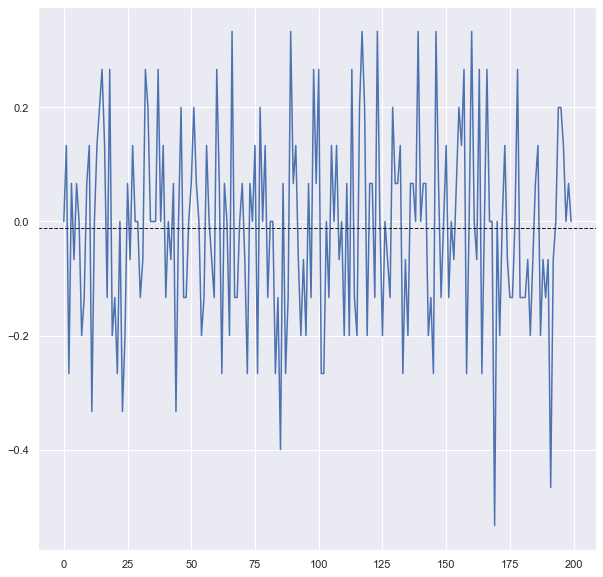

In [113]:
import matplotlib.pyplot as plt
 
avg_list = np.array(results)
plt.figure(figsize=(10,10))
plt.plot(avg_list)
plt.axhline(np.array(avg_list).mean(), color='k', linestyle='dashed', linewidth=1)


## Sampling an Unknown Distribution

Another way we can use Monte Carlo simulation is to learn about an unknown distribution.  

This is an important topic when we try to find a Maximum Likelihood Estimation (MLE) solution.   That's when we think we know the general distribution for a data set (normal, maybe) and we try to find the best values of the mean and standard deviation.   

"Best" means that we minimize the errors between the distribution implied by our estimated values and the actual, observed distribution.

If our distributions are parametric (that means they can be described by an equation), the process is pretty straightforward - we can do things like find minimum and maximum values by setting the first derivative to zero then solving for the parameters.  Or we can solve for the value at any point under the distribution.

If our distributions are nonparametric, or if we have a high-dimension data space, the analytical solutions may be intractable or too expensive.  In these cases, we need to sample the space to discover its characteristics.

In this example we will:

    Generate a funky, but parametric distribution...

    ... but pretend we don't know what it looks like.

    Use sampling to discover its characteristics.

    Check how well the sampling did (we're cheating, after all)!

## Generate a Distribution

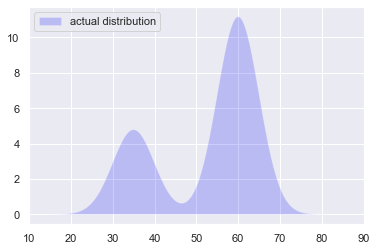

In [114]:
# Import matplotlib's plotting tool, the Gaussian (normal) distribution from scipy,
#   and scipy's stats package.

import matplotlib.pyplot as plt
from scipy.stats import norm, stats


#  Use np.linspace to create even increments  np.linspace(<high>, <low>, <intervals>)
#     np.newaxis is an alias for None.  This creates a 2d array with shape (1000, 1).
X_plot = np.linspace(10, 100, 1000)[:, np.newaxis]

# Create our funky distribution.   This is really two normal distributions, scaled and
#    smooshed together.
true_dens = (0.3 * norm(35, 5).pdf(X_plot[:, 0])  + \
             0.7 * norm(60, 5).pdf(X_plot[:, 0])) * \
            200

#  Let's have a look ..
fig, ax = plt.subplots()

# This is what we'll plot  ax_fill(<x-values>, <y-values>, <some aesthetics>)
ax.fill(X_plot[:, 0], true_dens, fc='blue', alpha=0.2,label='actual distribution')

# Add a couple more aesthetics.
ax.legend(loc='upper left')
ax.set_xlim(10, 90)

# Show the plot, then reset it for the next use.
plt.show()
plt.close()

OK.   This is our "unknown" distribution.   This may be the response surface of a high-dimension parameter space we're trying to resolve to generate a prior for a Bayesian simulation.  It doesn't really matter, but we can't solve it with numerical methods.

## Making Observations

But we can observe it.   This function essentially replicates the equation(s) that generated our solution space.  This will be the "world" that we'll explore.

If we pass it x it will return some f(x):

In [115]:
def generate_obs(x):
    "Return a single point from the distributino"
    return (0.3 * norm(35, 5).pdf(x)  + \
            0.7 * norm(60, 5).pdf(x)) * \
                200

We can test it out with a few numbers to make sure it's reasonable:

In [116]:
# This should be about the peak.
generate_obs(60)

11.170401691874291

In [117]:
# This should be a low value.
generate_obs(50.12)


1.6350973427331514

Let's have a look at some summary data for our distribution.    If our sampling is any good, we should be able reproduce these stats (more or less) from our observations.

In [118]:
original_stats = stats.describe(true_dens)
original_stats

DescribeResult(nobs=1000, minmax=(1.4146359033903299e-13, 11.170401691874291), mean=2.219999817876447, variance=9.630551838150744, skewness=1.5346304017651526, kurtosis=1.3675053628668294)

## Explore the Dataspace

Create a routine that wraps up our generate_obs() function.  It randomly creates some x-values and sorts them (that way our plot will be interpertable).

In [119]:
import random


In [120]:
import random
def query_data(lower=20, upper=80, n_obs=100, verbose=False, seed=1):
    " Generate a list of results of the generate_obs() function from random inputs"
    
    random.seed(seed)
    
    # Use random.uniform() to create random values and create a list
    observations = []
    x = [random.uniform(lower, upper) for _ in range(n_obs)]
    
    # Sort the list.  That will make our plot actually readable.
    #   NB:  x.sort() returns None so we can't add sort() to our definition of x
    x.sort()
    
    # Runs through our random inputs and remenbers the results
    for xval in x:                
        obs = generate_obs(xval)
        observations.append(obs) 
        if verbose:  
            print(f"f({xval:2.3f}) = {obs:2.3f}")
            
    return x, observations      

We'll sample the data using the query_data() routine here, then plot it in the next cell.

In [121]:
# Query the distribution.  You probably want to leave the bounds close to 20 and 80, but play with the n_obs.
n_obs = 100    
lower = 20
upper = 75

x, obs = query_data (lower=lower, upper=upper, n_obs=n_obs, verbose=False)   

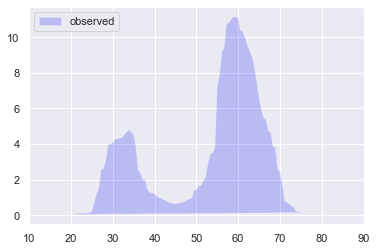

In [122]:
obs_array = np.array(obs)

# Create instances of matplotlib.plt objects
fig, ax = plt.subplots()

# Create the x-values and y-values to plot.  The y-values will be a Numpy array.
X_plot = np.linspace(lower, upper, n_obs)[:, np.newaxis]
y_plot = np.array(obs)

# Specify the plot object.
ax.fill(X_plot[:, 0], y_plot, fc='blue', alpha=0.2, label='observed')
ax.legend(loc='upper left')
ax.set_xlim(10, 90)

# Et, voila!
plt.show()


Depending on your n_obs, you'll see the original distribution (more or less).  The lower the N, the more jagged it'll look.   It passes the "eyeball test".   

What about the stats?

In [123]:
estimated_stats = stats.describe(obs) 
estimated_stats

DescribeResult(nobs=100, minmax=(0.05699450221314087, 11.148220700551677), mean=3.4505622762450874, variance=11.296172934949421, skewness=1.0352910281606234, kurtosis=-0.1270675199605238)

In [124]:
# A tuple of tuples that we can unpack.  This format is pretty easy to read/maintain IMHO.

comps = ( ('mean',  original_stats.mean, estimated_stats.mean), 
          ('var ',  original_stats.variance, estimated_stats.variance),
          ('max ',  original_stats.minmax[1], estimated_stats.minmax[1]),       
        )

print("Results:\n")
for stat, orig, est in comps:
    print(f"stat: {stat} orig: {orig:2.3f}  est: {est:2.3f}, delta: {orig-est:2.3f}")

Results:

stat: mean orig: 2.220  est: 3.451, delta: -1.231
stat: var  orig: 9.631  est: 11.296, delta: -1.666
stat: max  orig: 11.170  est: 11.148, delta: 0.022


## Refining the Exploration

Our estimates seem a bit off, don't they?   The reason has a lot to do with our sampling design.   We may be sampling with too wide a range of x-values, essentially querying for "empty" parts of the range of y-values.  It could be many things, but that's OK.  The mean isn't the best test for a distribution without a centeral tendancy.

Besides, we're seldom interested in the whole distribution.  In a complex data space, it would take a really long time to sample everything, anyway.   Usually sampling is 'adaptive'.  That means that the next sample depends on what we have learned about past samples.   We're typically interested in finding 'gradients'.  You can think of these as slopes.  If we're looking for a local maximum, we can do a 'hill climbing' exercise to take the steepest path to the top.

Here's how we might do it:

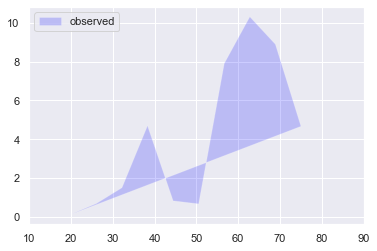

In [125]:
n_obs = 10    
lower = 20
upper = 75

# Query the data
x, obs = query_data (lower=lower, upper=upper, n_obs=n_obs, verbose=False) 
obs_array = np.array(obs)

# Create instances of matplotlib.plt objects
fig, ax = plt.subplots()

# Create the x-values and y-values to plot.  The y-values will be a Numpy array.
#  The " [:.newaxis]" bit is an ideom that 
X_plot = np.linspace(lower, upper, n_obs)[:, np.newaxis]
y_plot = np.array(obs)

# Specify the plot object.
ax.fill(X_plot[:, 0], y_plot, fc='blue', alpha=0.2, label='observed')
ax.legend(loc='upper left')
ax.set_xlim(10, 90)

# Et, voila!
plt.show()

It's easy to 'eyeball' the result.  The max value will be somewhere between x = 55 and x = 70.

Let's print the actual values.   First we'll combine x and f(x) into a single array:

In [126]:
# Create an ndarray with columns (x, f(x)).  This simply combines the columns.
#   Note: there's also a method np.hstack() that combines rows.

xy = np.stack((np.array(x), obs_array), axis=1)

xy

array([[21.55911121,  0.12909823],
       [25.16227727,  0.69097775],
       [27.39003343,  1.50341065],
       [34.02879642,  4.6978581 ],
       [44.72200856,  0.82784055],
       [47.24892979,  0.67051878],
       [55.8376135 ,  7.89997283],
       [62.00760404, 10.30528336],
       [63.37978431,  8.88893452],
       [66.60885553,  4.66331491]])

We can scan these values to figure out the row we need.  

For simplicity we'll define a function to simply return the values.

In [127]:
def get_max_xy(xy_arr):
    " Input is two-col ndarray.  Cols: [x, f(x)].  Returns x and f(x) at max f(x) value."
    
    max_row = xy_arr[np.where(xy[:,1] == np.max(xy_arr[:,1]))][0]
    x_max, y_max = max_row[0], max_row[1]

    return x_max, y_max

In [128]:
print(get_max_xy(xy))

(62.00760404371377, 10.30528336267572)


Yes, that's a horrible equation!   Numpy can be that way.  Pandas is a bit more kind.

But, let's break it down, anyway, so you'll get a sense of how all this gobbledy-gook works.

In [129]:
# Isolate the f(x) column with a slice
f_x_col = xy[:,1]

print(f"First few rows of f(x) column:\n {f_x_col[:3]}\n" )

# Find the max value of f(x)
max_f_x = np.max(f_x_col)

print(f"The max value is {max_f_x}\n")

# Figure out what row the max value occurs in
max_row_num  = np.where(f_x_col == max_f_x)

print(f"... which is in row {max_row_num[0]}\n")

# Grab the row that contains the maximum f(x) value (strip the first element with '[0][0]' bit)
max_row = xy[max_row_num, :][0][0]

print(f"The row with the x, f(x) values where f(x) is maxed out:\n{max_row}\n")

# Capture the x and y values
x_max, y_max = max_row[0], max_row[1]

print(f"x: {x_max}   y: {y_max}")


First few rows of f(x) column:
 [0.12909823 0.69097775 1.50341065]

The max value is 10.30528336267572

... which is in row [7]

The row with the x, f(x) values where f(x) is maxed out:
[62.00760404 10.30528336]

x: 62.00760404371377   y: 10.30528336267572


## Recap

We have created a bunch of stuff so far:

    A parametrically-created bimodal distribution (which we'll pretend is not).

    A means of sampling the distribution

    A means of analyzing the sample results

Next, we'll implement a crude gradient search and see if we can't find the maximum value.

## Gradient Search

A gradient search will explore the data space based on the slope.  The 'slope' can be high-dimension and a bit hard to see or understand.   For now, accept that the concept that we can work with in 2-D space is completely extensible.

We'll build a very simple gradient search tool to demonstrate how and where Monte Carlo techniques play.

We'll begin with a reasonable guess based on our first sample:

In [130]:
guess0 = x_max
result0 = y_max

Now, we'll try values of x on either side of the current guess.  The idea is to find the direction of the most improvement.   If we're in a 'saddle', both directions might be higher.   

How far do we move x?  In practice, that might be variable.   Big steps can cover a lot of ground quickly, but likely will not find the true maximum.   Small steps can take forever and the analysis may get tricked into thinking a local maximum is the global one.  We'll just go ahead and pick an arbitrary one.

    step = 1

Another factor is how far in the distance to look in either direction.  Some sort of averaging likely makes sense because the 'molehill' right next door is probably not representative.  We might create a 'frame of reference' to define how many values either way we'll sample.  We'll pick another arbitrary value:

    frame = 3

In [131]:
step = 1
frame = 3
guess = x_max

Let's build a couple of tools to handle these

In [132]:
from statistics import mean

def next_x_vals(guess, frame=3, step=1, direction='up', samples=None):
    """Create and return a vector such that each element is 'step' different
         from the last, starting at guess +/- step, depending on the 
         'direction'.  The length of the vector is 'frame'.  """
    
    return_list = []
    for ix in range(frame ):
        if direction == 'up':
            return_list.append(guess + ix * step)
        else:
            return_list.append(guess - ix * step)
            
    return return_list
            
    
def next_y_vals(next_x_vals, func):
    """ Given a vector of next_x_vals and a function, create and return a vector of f(x)."""
    
    return_vector = []
    
    for x in next_x_vals:
        return_vector.append(func(x))        
    return return_vector


def gradient_search_max(guess, func, lower_bound, upper_bound, step, frame, direction=None):
    """Conduct a gradient search to find max value of a solution space."""  
    
    DEBUG = False
    
    # Remember the oringinal guess
    original_guess = guess
    original_result = func(original_guess)
    if DEBUG: print(f"current: x {original_guess:.2f}   y {original_result:.2f}")
    
    # Find x values for a few steps higher and lower than current guess.
    x_going_up = next_x_vals(guess, frame, step, 'up')
    x_going_down = next_x_vals(guess, frame, step, 'down')
    if DEBUG: print(x_going_up, x_going_down)
    
    
    # Find corresponding mean y values
    y_going_up = mean(next_y_vals(x_going_up, func))
    y_going_down = mean(next_y_vals(x_going_down, func))
    if DEBUG: print(f"y_going_down: {y_going_down:.2f}  y_going_up: {y_going_up:.2f} ")
    
    
    # Figure out if we're going up or down
    if direction is None:
        if y_going_up >= original_result and y_going_up >= y_going_down:
            direction = 'up'
        if y_going_down > original_result and y_going_up < y_going_down:
            direction = 'down' 
        print(f"We're searching {direction}.")
    
    # Adjust the guess as needed
    if direction == 'up' and y_going_up >= original_result:
        guess = original_guess + step
    elif direction == 'down'  and y_going_down >= original_result:
        guess = original_guess - step
            
    # We'll keep going if the guess changed and it's within bounds. Otherwise we're done.
    if guess != original_guess and guess >= lower_bound and guess <= upper_bound:
        print(f"Current answer:  x: {guess:.2f}  y: {func(guess):.2f}")
        gradient_search_max(guess, func, lower_bound, upper_bound, step, frame, direction=direction)
        
    else:
        print(f"Final answer:  x: {guess:.2f}  y: {func(guess):.2f}")
        return guess


    
func = generate_obs
lower_bound_gradient = 0
upper_bound_gradient = 100
step = .1
frame = 3

gradient_search_max(guess, func, lower_bound_gradient, upper_bound_gradient, step, frame)

We're searching down.
Current answer:  x: 61.91  y: 10.39
Current answer:  x: 61.81  y: 10.46
Current answer:  x: 61.71  y: 10.54
Current answer:  x: 61.61  y: 10.61
Current answer:  x: 61.51  y: 10.67
Current answer:  x: 61.41  y: 10.74
Current answer:  x: 61.31  y: 10.79
Current answer:  x: 61.21  y: 10.85
Current answer:  x: 61.11  y: 10.90
Current answer:  x: 61.01  y: 10.95
Current answer:  x: 60.91  y: 10.99
Current answer:  x: 60.81  y: 11.03
Current answer:  x: 60.71  y: 11.06
Current answer:  x: 60.61  y: 11.09
Current answer:  x: 60.51  y: 11.11
Current answer:  x: 60.41  y: 11.13
Current answer:  x: 60.31  y: 11.15
Current answer:  x: 60.21  y: 11.16
Current answer:  x: 60.11  y: 11.17
Current answer:  x: 60.01  y: 11.17
Final answer:  x: 60.01  y: 11.17


## Exercise

In this solution, we used a 'step' to sample the region of the distribution around our current guess.  So if our guess is 100, our frame is 3, and our step is 1 we would sample at [100, 101, 102] if we were going up.   We would sample at [100, 99, 98] if we were going down.

Using Monte Carlo we would randomize that sample within the region between 100 and 102 going up; and between 100 and 98 going down.  Can you write an alternative to next_x_vals() that would use random sampling instead of a fixed step size to accomplish the same goal?

You'll need to develop a new routine to pick the x-values, and may want to adapt the gradient_search_max() function to accommodate new options.

You will find some starter code here:  solution_monte_carlo_starter_code

... it has the key imports, functions, and other parameters used in this notebook (just a bit more consolidated).

Solution:  solution_monte_carlo

# Python Machine Learning Ecosystem




## TensorFlow

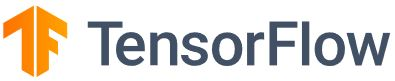





TensorFlow is an open source library developed at Google to support machine learning.  Its focus is on deep neural networks.  It was developed by Geoffrey Hinton, Jeff Dean (and many others!) starting in 2009 with an initial focus on speech recognition.  It's integrated with Kubernetes via the Kubeflow application.   Version 2.0 was released in 2019, along with TensorFlow Graphics (deep learning in graphics).  It's main applications now are around image capturing.

Google developed its 'Tensor processing unit' (TPU) - a chip designed precisely for TensorFlow.  These power Google Compute and when stacked into clusters of 64 TPUs can deliver 11.5 petaflops.   They are now available to the world on the Google Cloud Platform.

It's got a Python API (3.7+).   It also has bindings to C++, Go, Julia, and a host of others.

It's built on numpy and uses numpy.ndarray objects as base building blocks.  It has a numpy-friendly API, so you can work with tensors pretty much the same way you'd work with numpy arrays.  These links will get you started.

To install:  
$ conda install -c anaconda tensorflow 

https://www.tensorflow.org/guide/tf_numpy

https://www.tensorflow.org

**Keras** is an API that allows easy creation of training tasks across multiple GPUs, TPUs, or machines.  It handles a stack of single inputs and single outputs of tensors, sequentially processed.   It can be used for feature extraction with complex models.  It works well with Google Colab, a hosted Jupyter Notebook site.

https://www.tensorflow.org/guide/keras/sequential_model

Here's a bit of TensorFlow code from the official docs:


## PyTorch

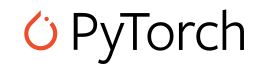



PyTorch is a Python (3.6-3.8) implemention of **Torch**.  Torch is a scientific computing framework and machine learning library. Torch itself uses a Lua wrapper over a C implementation of tensor arrays.   It has packages for loss functions (accuracy) and neural networks.  PyTorch is a Facebook project that took over development of Torch in 2020.

PyTorch supports automatic differentiation (calculation of high-dimension gradients) and a variety of optimization methods useful for building neural nets.   It is built on top of numpy and the pytorch.Tensor object is fundamentally a numpy.ndarray.   

PyTorch is CUDA-compatible (CUDA is an Nvidia platform/library for GPU-enabled parallel computing).

Several other applications wrap and extend PyTorch including **Tesla Autopilot**, Uber's **Pyro** application, and **PyTorch Lightning**.

It's supported on AWS, Google Cloud Platform, and Microsoft Azure.

To install:   
$ conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch 

You can learn more here:

https://pytorch.org/    

https://github.com/PyTorchLightning/pytorch-lightning

https://developer.nvidia.com/about-cuda

## Numba

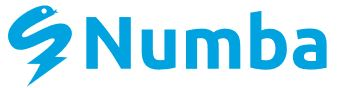



Numba is a 'just in time' compiler that optimizes, compiles, and parallelizes arbitrary Python (3.6-3.9) functions - essentially turning your code into machine language using the LLVM compiler infrastructure.  It's CUDA-compatible, so can attain silicon-level optimization whether you're using CPUs or GPUs.   It's built on numpy and mostly designed to optimize the performance of numpy.ndarray objects.

It saves the step of converting Python into C/C++ code - this happens at execution time, making the performance enhancements completely portable.   It's implemented using simple decorator functions like.

Here are some examples from the official docs:

In [135]:
""" Parallelizes operations """
from numba import jit
@jit(nopython=True, parallel=True)
def simulator(out):
    # iterate loop in parallel
    for i in prange(out.shape[0]):
        out[i] = run_sim()

In [136]:
""" Compile an arbitrary function """
from numba import jit
import random

SAMPLES = 1e5

@jit(nopython=True)
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

%timeit -n1000 monte_carlo_pi(SAMPLES)

1.22 ms ± 238 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


To install:  
$ conda install numba

These links will lead you to the docs and more examples.

http://numba.pydata.org/
https://llvm.org/

## PyMC3  

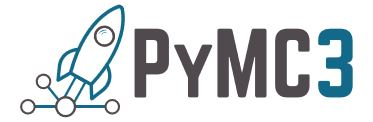



PyMC3 is used for Bayesian linear regression (and Bayesian inference, generally).   PyMC3 also contains a factor analysis module.  It specializes in simulation-based optimization of complex, high-dimension data spaces and can even handle data spaces that are defined parametrically at run-time.  PyMC3 also contains a factor analysis module

With PyMC3, you can implement a Marcov chain Monte Carlo with sampling algorithms NUTS (No-U-Turn sampler) and HCM (Hamiltonian Monte Carlo) that's self-tuning; that means you don't need prior knowledge of the distribution.

NUTS (No U-Turn Sampling) is a way to characterize an unknown distribution by drawing correlated samples that will converge in distribution to the unknown distribution.   It's written up by Matthew Hoffman (*J. Machine Learning Research, 2014*).   It eliminates the need to do a random walk of the distribution by calculating gradients and using them for the next target region to explore.

It's a tweak to Hamiltonian Monte Carlo approach that replaces random walk with simulation of Hamiltonian dynamics.  That's the bit that requires calculation of the gradient.   Gradient calculation requires that the user pick the step size ($\epsilon$) and the number of steps (L) - and getting these right can be really tough. 

Hamiltonian dynamics uses an auxialiary momentum variable $r_d$ for each model variable $\theta_d$.  It's based on partical dynamics where theta is a partical's position in D-dimensional space.   The momentum variable is the momentum in the dth dimension.  It factors in the position-dependent negative potential energy and the kinetic energy of the particle.

**Theano** is used under the hood for gradient calculation - it uses differentiation and can complile probabilistic problems to C on the fly.   Theano allows expressions to be defined as tensors, which are tightly integrated with numpy.ndarray objects.

To install:

$ conda install -c conda-forge pymc3

http://docs.pymc.io

http://docs.pymc.io/pymc-examples/examples/pymc3_howto/api_quickstart.html

Here is an example from the docs:

## Bokeh

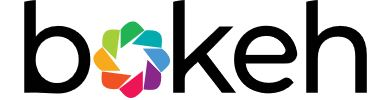



Bokeh is an all-purpose, interactive visualization library that wraps **matplotlib** and integrates tools like **Datashader** and **Holoviews**.   It's particularly useful for visual exploration of complex (or even streaming) data sets.   It's also useful for creating dashboards as "visual APIs" into your analytical work for presentation or collaboration purposes.

To install:

$ conda install -c anaconda bokeh 

https://bokeh.org/
https://docs.bokeh.org/en/latest/docs/user_guide.html
https://github.com/bokeh/bokeh

Here's an example from Bokeh's on-line tutorial:

In [137]:
# Standard imports 

from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [138]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

group = df.groupby(by=['cyl', 'mfr'])
source = ColumnDataSource(group)

p = figure(plot_width=800, plot_height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'], 
                         factors=sorted(df.cyl.unique()), end=1)

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

# Reset the plotting object
from bokeh.plotting import reset_output, output_notebook
try:
    reset_output()
    output_notebook()
    show(p)
except:
    output_notebook()
    show(p)

Loading BokehJS ...

In [139]:
%matplotlib inline
from bokeh.plotting import figure, output_file, save, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [4, 5, 5, 7, 2]

# set output to static HTML file
output_file(filename="custom_filename.html", title="Static HTML file")

# create a new plot with a specific size
p = figure(sizing_mode="stretch_width", max_width=500, plot_height=250)

# add a circle renderer
circle = p.circle(x, y, fill_color="red", size=15)

# save the results to a file
save(p)

try:
    reset_output()
    output_notebook()
    show(p)
except:
    output_notebook()
    show(p)

Loading BokehJS ...

Loading BokehJS ...

In [140]:
# Create and deploy interactive data applications

from IPython.display import IFrame
IFrame('https://demo.bokeh.org/sliders', width=900, height=500)